In [1]:
import json

In [48]:
with open("../data/generation_test_data/physical_data_sentences.json", "r") as f:
    physical_sents = json.load(f)

In [54]:
physical_sents

{'0-antonym-asymmetric_conclusion': {'correct': 'A is smaller than B, so B is easier to contain objects with than A',
  'incorrect': 'A is smaller than B, so B is harder to contain objects with than A'},
 '0-antonym-asymmetric_premise': {'correct': 'B is smaller than A, so A is easier to contain objects with than B',
  'incorrect': 'B is smaller than A, so A is harder to contain objects with than B'},
 '0-antonym-original': {'correct': 'A is smaller than B, so A is harder to contain objects with than B',
  'incorrect': 'A is smaller than B, so A is easier to contain objects with than B'},
 '0-negation-asymmetric_conclusion': {'correct': 'A is smaller than B, so B is not easier to put into a box than A',
  'incorrect': 'A is smaller than B, so B is not harder to put into a box than A'},
 '0-negation-asymmetric_premise': {'correct': 'B is smaller than A, so A is not easier to put into a box than B',
  'incorrect': 'B is smaller than A, so A is not harder to put into a box than B'},
 '0-n

In [58]:
test_keys

{'mat': ['0-original-asymmetric_premise',
  '0-negation_antonym-asymmetric_conclusion',
  '0-negation_paraphrase_inversion-original',
  '1-paraphrase_inversion-asymmetric_premise',
  '1-negation_paraphrase-original',
  '1-negation_paraphrase-asymmetric_conclusion',
  '2-paraphrase-asymmetric_conclusion',
  '2-negation_paraphrase-original',
  '2-negation_paraphrase_inversion-asymmetric_conclusion',
  '3-original-asymmetric_conclusion',
  '3-antonym-asymmetric_conclusion',
  '3-negation_antonym-asymmetric_premise',
  '4-negation-asymmetric_premise',
  '4-negation_paraphrase-asymmetric_premise',
  '4-negation_paraphrase_inversion-original',
  '5-original-asymmetric_conclusion',
  '5-paraphrase_inversion-asymmetric_premise',
  '5-negation_paraphrase_inversion-asymmetric_conclusion',
  '6-negation-original',
  '6-paraphrase-asymmetric_conclusion',
  '6-negation_paraphrase-original',
  '7-antonym-asymmetric_conclusion',
  '7-paraphrase_inversion-asymmetric_conclusion',
  '7-negation_paraphra

In [55]:
with open("../data/finetune_data/sample_from_sets/test_keys.json", "r") as f:
        test_keys = json.load(f)

phy_filtered = {}
for key in test_keys['phy']:
    phy_filtered[key] = physical_sents[key]
        
#     index = key.split("-")[0]
#     ling_pert = key.split("-")[1]
#     asym_pert = key.split("-")[2]
#     if index not in phy_filtered.keys():
#         phy_filtered[index] = {}
#         phy_filtered[index][ling_pert] = {}
#         phy_filtered[index][ling_pert][asym_pert] = physical_sents[index][ling_pert][asym_pert]
#     elif ling_pert not in phy_filtered[index].keys():
#         phy_filtered[index][ling_pert] = {}
#         phy_filtered[index][ling_pert][asym_pert] = physical_sents[index][ling_pert][asym_pert]
#     else:
#         phy_filtered[index][ling_pert][asym_pert] = physical_sents[index][ling_pert][asym_pert]

In [57]:
len(phy_filtered)


60

In [51]:
test_keys

{'mat': ['0-original-asymmetric_premise',
  '0-negation_antonym-asymmetric_conclusion',
  '0-negation_paraphrase_inversion-original',
  '1-paraphrase_inversion-asymmetric_premise',
  '1-negation_paraphrase-original',
  '1-negation_paraphrase-asymmetric_conclusion',
  '2-paraphrase-asymmetric_conclusion',
  '2-negation_paraphrase-original',
  '2-negation_paraphrase_inversion-asymmetric_conclusion',
  '3-original-asymmetric_conclusion',
  '3-antonym-asymmetric_conclusion',
  '3-negation_antonym-asymmetric_premise',
  '4-negation-asymmetric_premise',
  '4-negation_paraphrase-asymmetric_premise',
  '4-negation_paraphrase_inversion-original',
  '5-original-asymmetric_conclusion',
  '5-paraphrase_inversion-asymmetric_premise',
  '5-negation_paraphrase_inversion-asymmetric_conclusion',
  '6-negation-original',
  '6-paraphrase-asymmetric_conclusion',
  '6-negation_paraphrase-original',
  '7-antonym-asymmetric_conclusion',
  '7-paraphrase_inversion-asymmetric_conclusion',
  '7-negation_paraphra

In [14]:
physical_sents['0-antonym-asymmetric_conclusion']['correct'].split(',')[0]

'A is smaller than B'

In [44]:

all_conclusions = []

for key, val in physical_sents.items():
    conclusion = val['correct'].split(',')[1][1:]
    all_conclusions.append(conclusion)
    conclusion = val['incorrect'].split(',')[1][1:]
    all_conclusions.append(conclusion)


In [45]:
all_conclusions

['so A was hungry before eating dinner',
 'so A was hungry after eating dinner',
 "so A wasn't hungry after eating dinner",
 "so A wasn't hungry before eating dinner",
 'so A was full after eating dinner',
 'so A was full before eating dinner',
 'so A was starving of food before eating dinner',
 'so A was starving of food after eating dinner',
 "so A wasn't stuffed with food before dinner",
 "so A wasn't stuffed with food after dinner",
 "so A wasn't full before eating dinner",
 "so A wasn't full after eating dinner",
 "so A wasn't starving of food after eating dinner",
 "so A wasn't starving of food before eating dinner",
 'so A was stuffed with food after dinner',
 'so A was stuffed with food before dinner',
 'so A was cold before turning on the heater',
 'so A was cold after turning on the heater',
 "so A wasn't cold after turning on the heater",
 "so A wasn't cold before turning on the heater",
 'so A was warm after turning on the heater',
 'so A was warm before turning on the heat

In [12]:
key = '0-antonym-asymmetric_conclusion'
int(key.split('-')[0])

0

In [46]:
import random 
neutral_phy = {}
for key, val in physical_sents.items():
    premise = val['correct'].split(',')[0]
    conclusion_pool = all_conclusions[:]
    index = int(key.split('-')[0])
    start = index*48
    end = start+48
    del conclusion_pool[start:end]
    conclusion = random.sample(conclusion_pool,1)[0]
    val['neutral'] = premise+', '+conclusion
    neutral_phy[key] = val

with open('../data/entailment_test_data/temporal_data_sentences.json', 'w') as outfile:
    json.dump(neutral_phy, outfile)

In [47]:
neutral_phy

{'0-antonym-original': {'correct': 'A was eating dinner, so A was full after eating dinner',
  'incorrect': 'A was eating dinner, so A was full before eating dinner',
  'neutral': 'A was eating dinner, so A was alive before dying'},
 '0-negation-original': {'correct': "A was eating dinner, so A wasn't hungry after eating dinner",
  'incorrect': "A was eating dinner, so A wasn't hungry before eating dinner",
  'neutral': "A was eating dinner, so the alarm clock wasn't silent before A turned it off"},
 '0-negation_antonym-original': {'correct': "A was eating dinner, so A wasn't full before eating dinner",
  'incorrect': "A was eating dinner, so A wasn't full after eating dinner",
  'neutral': 'A was eating dinner, so A was at a smaller age after growing up'},
 '0-negation_paraphrase-original': {'correct': "A was eating dinner, so A wasn't starving of food after eating dinner",
  'incorrect': "A was eating dinner, so A wasn't starving of food before eating dinner",
  'neutral': 'A was eat

In [3]:
with open("../data/truism_data/physical_data_sentences_2.json", "r") as f:
    physical_sents = json.load(f)
    
with open("../data/truism_data/physical_data_2.json", "r") as f:
    physical_config = json.load(f)

with open("../data/finetune_data/sample_from_sets/test_keys.json", "r") as f:
    test_keys = json.load(f)

In [4]:
test_keys

{'mat': ['0-original-asymmetric_premise',
  '0-negation_antonym-asymmetric_conclusion',
  '0-negation_paraphrase_inversion-original',
  '1-paraphrase_inversion-asymmetric_premise',
  '1-negation_paraphrase-original',
  '1-negation_paraphrase-asymmetric_conclusion',
  '2-paraphrase-asymmetric_conclusion',
  '2-negation_paraphrase-original',
  '2-negation_paraphrase_inversion-asymmetric_conclusion',
  '3-original-asymmetric_conclusion',
  '3-antonym-asymmetric_conclusion',
  '3-negation_antonym-asymmetric_premise',
  '4-negation-asymmetric_premise',
  '4-negation_paraphrase-asymmetric_premise',
  '4-negation_paraphrase_inversion-original',
  '5-original-asymmetric_conclusion',
  '5-paraphrase_inversion-asymmetric_premise',
  '5-negation_paraphrase_inversion-asymmetric_conclusion',
  '6-negation-original',
  '6-paraphrase-asymmetric_conclusion',
  '6-negation_paraphrase-original',
  '7-antonym-asymmetric_conclusion',
  '7-paraphrase_inversion-asymmetric_conclusion',
  '7-negation_paraphra

In [30]:
physical_config

{'0': {'antonym_switch': ['put into a box', 'contain objects with'],
  'commonsense_fact': 'smaller objects are easier to put into a box',
  'greater_than': 'A',
  'initial_comparison': 'A is smaller than B',
  'inverted_paraphrase': 'finds it harder to contain objects than',
  'is_more': True,
  'negation_switch': {'0': ['is', 'is not'],
   '1': ['can', 'can not'],
   '2': ['finds', 'does not find']},
  'original_comparison': 'is easier to put into a box than',
  'paraphrase': 'can fit into more containers than',
  'premise_switch': {'0': ['easier', 'harder'],
   '1': ['more', 'less'],
   '2': ['harder', 'easier']},
  'template': '4'},
 '1': {'antonym_switch': ['sinking', 'floating'],
  'commonsense_fact': 'heavier objects are better at sinking',
  'greater_than': 'A',
  'initial_comparison': 'A is heavier than B',
  'inverted_paraphrase': 'is worse at staying afloat than',
  'is_more': True,
  'negation_switch': {'0': ['is', 'is not'],
   '1': ['falls', 'does not fall'],
   '2': ['is

In [8]:
phy_filtered = {}
for key in test_keys['phy']:
    index = key.split("-")[0]
    ling_pert = key.split("-")[1]
    asym_pert = key.split("-")[2]
    if index not in phy_filtered.keys():
        phy_filtered[index] = {}
        phy_filtered[index][ling_pert] = {}
        phy_filtered[index][ling_pert][asym_pert] = physical_sents[index][ling_pert][asym_pert]
    elif ling_pert not in phy_filtered[index].keys():
        phy_filtered[index][ling_pert] = {}
        phy_filtered[index][ling_pert][asym_pert] = physical_sents[index][ling_pert][asym_pert]
    else:
        phy_filtered[index][ling_pert][asym_pert] = physical_sents[index][ling_pert][asym_pert]

In [29]:
phy_filtered['19']

{'negation_paraphrase': {'asymmetric_conclusion': 'A is more magnetic than B, so B will not be harder to remove from a magnet than A'},
 'negation_paraphrase_inversion': {'asymmetric_premise': 'B is more magnetic than A, so A is not better to use when trying to connect magnets together than B'},
 'paraphrase': {'asymmetric_premise': 'B is more magnetic than A, so A will be easier to remove from a magnet than B'}}

In [4]:
import json
with open("../data/generation_test_data/physical_data_sentences.json", "r") as f:
    physical_sents = json.load(f)
    
test_index = ['15','18']
test_phy_sents = {}
for key, val in physical_sents.items():
    if key.split('-')[0] in test_index:
        test_phy_sents[key] = val
test_phy_sents

{'15-antonym-asymmetric_conclusion': {'correct': 'A is shorter than B, so B is worse for keeping things in reach than A',
  'incorrect': 'A is shorter than B, so B is better for keeping things in reach than A'},
 '15-antonym-asymmetric_premise': {'correct': 'B is shorter than A, so A is worse for keeping things in reach than B',
  'incorrect': 'B is shorter than A, so A is better for keeping things in reach than B'},
 '15-antonym-original': {'correct': 'A is shorter than B, so A is better for keeping things in reach than B',
  'incorrect': 'A is shorter than B, so A is worse for keeping things in reach than B'},
 '15-negation-asymmetric_conclusion': {'correct': 'A is shorter than B, so B is not worse for keeping things out of reach than A',
  'incorrect': 'A is shorter than B, so B is not better for keeping things out of reach than A'},
 '15-negation-asymmetric_premise': {'correct': 'B is shorter than A, so A is not worse for keeping things out of reach than B',
  'incorrect': 'B is sh

In [5]:
len(test_phy_sents.keys())

48

In [6]:

import json
import logging
import random
import string
import sys
import torch
sys.path.append('../experiment_utils/')
import experiment_utils as utils
sys.path.append('../')

from dataset_creation import pre_processing_utils as proc

def run_pipeline(model, fictitious_entities, sentences, config, number_of_entity_trials, logger):
    dataset = proc.prepare_masked_instances(sentences=sentences, 
                                            config=config, 
                                            fictitious_entities=fictitious_entities,
                                            num_entity_trials=number_of_entity_trials)    

    logger.info("finished creating dataset")

    perf = utils.fair_seq_masked_word_prediction(masked_examples=dataset,
                                                 model=model,
                                                 gpu_available=torch.cuda.is_available(),
                                                 top_n=100,
                                                 logger=logger)

    logger.info("finished evaluating dataset")
    
    output_df = utils.convert_bi_statistic_results_into_df(perf)

    return output_df

def main():
    random.seed(1012)
    logging.basicConfig(format = '%(asctime)s - %(levelname)s - %(name)s -   %(message)s',
                        datefmt = '%m/%d/%Y %H:%M:%S',
                        level = logging.INFO)
    logger = logging.getLogger(__name__)
    chars = string.ascii_lowercase
    number_of_entity_trials = 10

    roberta = torch.hub.load(github='pytorch/fairseq', model='roberta.base')

    names = proc.generate_pairs_of_random_names(number_of_pairs=100)
        
    with open("../data/truism_data/social_data_sentences_2.json", "r") as f:
        social_sents = json.load(f)
        
    with open("../data/truism_data/social_data_2.json", "r") as f:
        social_config = json.load(f)

    logger.info("finished reading in social data")

    output_df = run_pipeline(model=roberta, 
                             fictitious_entities=names, 
                             sentences=social_sents, 
                             config=social_config, 
                             number_of_entity_trials=number_of_entity_trials,
                             logger=logger)

    output_df.to_csv("../data/masked_word_result_data/roberta-base_w_name/social_perf_{}.csv".format(number_of_entity_trials),
                     index=False)

    logger.info("finished saving social results")

if __name__ == "__main__":
    main()


Using cache found in /Users/macbook/.cache/torch/hub/pytorch_fairseq_master


loading archive file http://dl.fbaipublicfiles.com/fairseq/models/roberta.base.tar.gz from cache at /Users/macbook/.cache/torch/pytorch_fairseq/37d2bc14cf6332d61ed5abeb579948e6054e46cc724c7d23426382d11a31b2d6.ae5852b4abc6bf762e0b6b30f19e741aa05562471e9eb8f4a6ae261f04f9b350
| dictionary: 50264 types


04/26/2020 17:14:36 - INFO - __main__ -   finished reading in social data
04/26/2020 17:14:36 - INFO - __main__ -   finished creating dataset


AttributeError: module 'experiment_utils' has no attribute 'fair_seq_masked_word_prediction'

In [3]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install ftfy

     |████████████████████████████████| 58 kB 4.1 MB/s eta 0:00:011
  Created wheel for ftfy: filename=ftfy-5.7-py3-none-any.whl size=47730 sha256=82c20210dcf4798a2e7cc0e7bdb79e724fcdea318da910ac0634a3cb4a6675fb
  Stored in directory: /Users/macbook/Library/Caches/pip/wheels/09/c8/8c/bbd52e77690905d5c933a68005098b6b168e8ea2deff43aa0c
Successfully built ftfy


In [1]:
import torch


In [2]:
roberta = torch.hub.load('pytorch/fairseq', 'roberta.large')

Using cache found in /Users/macbook/.cache/torch/hub/pytorch_fairseq_master


loading archive file http://dl.fbaipublicfiles.com/fairseq/models/roberta.large.tar.gz from cache at /Users/macbook/.cache/torch/pytorch_fairseq/83e3a689e28e5e4696ecb0bbb05a77355444a5c8a3437e0f736d8a564e80035e.c687083d14776c1979f3f71654febb42f2bb3d9a94ff7ebdfe1ac6748dba89d2
| dictionary: 50264 types


In [ ]:
[item[2] for item in roberta.fill_mask('femgtali is smaller than rsgueonam, so femgtali is <mask> likely to contain rsgueonam', topk=100)[0:4]]

In [57]:
roberta.fill_mask('dsmuda is smaller than quvqm, so quvqm is not <mask> able to enclose dsmuda', topk=100)

[('dsmuda is smaller than quvqm, so quvqm is not really able to enclose dsmuda',
  0.1213315799832344,
  ' really'),
 ('dsmuda is smaller than quvqm, so quvqm is not yet able to enclose dsmuda',
  0.09891846030950546,
  ' yet'),
 ('dsmuda is smaller than quvqm, so quvqm is not quite able to enclose dsmuda',
  0.07646976411342621,
  ' quite'),
 ('dsmuda is smaller than quvqm, so quvqm is not easily able to enclose dsmuda',
  0.05452137067914009,
  ' easily'),
 ('dsmuda is smaller than quvqm, so quvqm is not fully able to enclose dsmuda',
  0.0526752695441246,
  ' fully'),
 ('dsmuda is smaller than quvqm, so quvqm is not physically able to enclose dsmuda',
  0.04891572520136833,
  ' physically'),
 ('dsmuda is smaller than quvqm, so quvqm is not always able to enclose dsmuda',
  0.04822611063718796,
  ' always'),
 ('dsmuda is smaller than quvqm, so quvqm is not as able to enclose dsmuda',
  0.04534313827753067,
  ' as'),
 ('dsmuda is smaller than quvqm, so quvqm is not even able to enclos

## Read in templates

In [3]:
import json
with open("Truism Dataset/commen_sense_embedding_analysis-master 2/truism_data/physical_data_sentences.json", "r") as f:
    physical_data = json.load(f)
    
with open("Truism Dataset/commen_sense_embedding_analysis-master 2/truism_data/physical_data.json", "r") as f:
    physical_config = json.load(f)
    
with open("Truism Dataset/commen_sense_embedding_analysis-master 2/truism_data/material_data_sentences.json", "r") as f:
    material_data = json.load(f)
    
with open("Truism Dataset/commen_sense_embedding_analysis-master 2/truism_data/material_data.json", "r") as f:
    material_config = json.load(f)
    
with open("Truism Dataset/commen_sense_embedding_analysis-master 2/truism_data/social_data_sentences.json", "r") as f:
    social_data = json.load(f)
    
with open("Truism Dataset/commen_sense_embedding_analysis-master 2/truism_data/social_data.json", "r") as f:
    social_config = json.load(f)


In [14]:
physical_config['0']

{'antonym_switch': ['fit into', 'contain'],
 'initial_comparison': 'A is smaller than B',
 'inverted_paraphrase': 'is less able to enclose',
 'negation_switch': {'0': ['is', 'is not'],
  '1': ['is', 'is not'],
  '2': ['is', 'is not']},
 'original_comparison': 'is more likely to fit into',
 'paraphrase': 'is more easily put into',
 'premise_switch': {'0': ['more', 'less'],
  '1': ['more', 'less'],
  '2': ['less', 'more']},
 'template': '1'}

In [15]:
physical_data['0']

{'antonym': {'asymmetric_conclusion': 'A is smaller than B, so B is more likely to contain A',
  'asymmetric_premise': 'B is smaller than A, so A is more likely to contain B',
  'original': 'A is smaller than B, so A is less likely to contain B'},
 'negation': {'asymmetric_conclusion': 'A is smaller than B, so B is not more likely to fit into A',
  'asymmetric_premise': 'B is smaller than A, so A is not more likely to fit into B',
  'original': 'A is smaller than B, so A is not less likely to fit into B'},
 'negation_antonym': {'asymmetric_conclusion': 'A is smaller than B, so B is not less likely to contain A',
  'asymmetric_premise': 'B is smaller than A, so A is not less likely to contain B',
  'original': 'A is smaller than B, so A is not more likely to contain B'},
 'negation_paraphrase': {'asymmetric_conclusion': 'A is smaller than B, so B is not more easily put into A',
  'asymmetric_premise': 'B is smaller than A, so A is not more easily put into B',
  'original': 'A is smaller

In [11]:
material_data['4']

{'antonym': {'asymmetric_conclusion': 'A is made out of glass and B is made out of copper, so B is more sturdy than A',
  'asymmetric_premise': 'B is made out of glass and A is made out of copper, so A is more sturdy than B',
  'original': 'A is made out of glass and B is made out of copper, so A is less sturdy than B'},
 'negation': {'asymmetric_conclusion': 'A is made out of glass and B is made out of copper, so B is not more fragile than A',
  'asymmetric_premise': 'B is made out of glass and A is made out of copper, so A is not more fragile than B',
  'original': 'A is made out of glass and B is made out of copper, so A is not less fragile than B'},
 'negation_antonym': {'asymmetric_conclusion': 'A is made out of glass and B is made out of copper, so B is not less sturdy than A',
  'asymmetric_premise': 'B is made out of glass and A is made out of copper, so A is not less sturdy than B',
  'original': 'A is made out of glass and B is made out of copper, so A is not more sturdy than

In [4]:
# Get fictitious entities randomly generated
import random
from random import randint
import string

random.seed(1012)
def random_string_generator_variable_size(min_size, max_size, allowed_chars):
    return ''.join(random.choice(allowed_chars) for x in range(randint(min_size, max_size)))


chars = string.ascii_lowercase

fictitious_entities = []
for i in range(100):
    word_1 = random_string_generator_variable_size(3,12,chars)
    word_2 = random_string_generator_variable_size(3,12,chars)
    fictitious_entities.append((word_1, word_2))
    
fictitious_entities

[('femgtali', 'rsgueonam'),
 ('dpthmpxlfg', 'mrepurjhdxfa'),
 ('wcqbhzq', 'lyghy'),
 ('yfz', 'thqqrvkrqrm'),
 ('lzvt', 'elzbwfagwhe'),
 ('bwdybi', 'rqyktxy'),
 ('vqm', 'dsmu'),
 ('vkmkexj', 'fjgsfxqjwo'),
 ('umboff', 'lekeupfw'),
 ('swnwp', 'jklwvnsguk'),
 ('axf', 'dvrj'),
 ('yvczcwqx', 'siinp'),
 ('qrjlip', 'ubqia'),
 ('epbzbef', 'biocvr'),
 ('iaaayzpgnzv', 'fyamdsfa'),
 ('zlmslqgbjhx', 'srxptwhihnm'),
 ('ofy', 'yiruhuwhbom'),
 ('zws', 'hrjtf'),
 ('gxzytxjvbxr', 'fhnmoblw'),
 ('uxxdzijcf', 'yztkbblxgbe'),
 ('njbvmtjdqr', 'zwcxs'),
 ('ndvfw', 'wgfbahmo'),
 ('xtjxczop', 'gpjgcvi'),
 ('ezd', 'byr'),
 ('qvwi', 'gzgxbcffrlpi'),
 ('aklvkv', 'frrbsazfz'),
 ('jtmcg', 'mvdihyin'),
 ('ynoyodulpisk', 'nxuxdu'),
 ('eqtfuygsr', 'aquxecfgx'),
 ('mfk', 'ezyrgoibzs'),
 ('nbmdpna', 'cgoifrf'),
 ('muncodqs', 'vtvgcykw'),
 ('swt', 'tjjjrted'),
 ('eawjegvgvg', 'zzoicvrjigzq'),
 ('qioyzloy', 'wzvlqtg'),
 ('nczufgweurir', 'qsjrwcuoga'),
 ('oaphek', 'rcwt'),
 ('luf', 'jbpp'),
 ('zvyldya', 'dfrxelfoy'),
 ('v

In [67]:
len(fictitious_entities)

100

In [25]:
## Iterate through each perturbation to get an average score 12 * 3 = 36 perturbations

physical_results = [] # {'0':{'antonym':{'asymmetric_conclusion':{'masked_sent':'...', 'avg_score': xx}, '...'}, '...'}, 'x'}
for index, truism in physical_data.items(): # Each truism: we have 5 types
#     truism['candidate_answers'] = [physical_config[index]['original_comparison'], \
#                                    physical_config[index]['antonym_comparison']] # Add candidate answers for masks
    for perturb_type, sub_truism in truism.items(): # Each perturb type (negation, antonum, etc, excluding asymmetry)
#         if 'negation_paraphrase' in perturb_type:
#             continue
        if 'paraphrase' not in perturb_type:
            candidate_answers = physical_config[index]['premise_switch']['0']
        elif '_inversion' not in perturb_type:
            candidate_answers = physical_config[index]['premise_switch']['1']
        else:
            candidate_answers = physical_config[index]['premise_switch']['2']
        for sub_type, sent in sub_truism.items(): # Original, asymmetric premise, and asymmetric conclusion
            masked_sent = ''
            filled_sent = ''
            right_answer = ''
            wrong_answer = ''
            for answer in candidate_answers:
                if answer in sent.split(',')[1].split(): # We only mask the second half (conclusion)
                    masked_sent_half = str.replace(sent.split(',')[1], ' '+answer, ' <mask>')
                    masked_sent = sent.split(',')[0]+','+masked_sent_half
                    print(masked_sent)
                    right_answer = answer
                else:
                    wrong_answer = answer
            if masked_sent == '':
                #print(sent)
                #print(candidate_answers)
                continue
            #if right_answer
            binary_avg_score = 0
            ratio_avg_score = 0
            for j in range(len(fictitious_entities)):
                fill_A = str.replace(masked_sent, 'A', fictitious_entities[j][0])
                filled_sent = str.replace(fill_A, 'B', fictitious_entities[j][1])
                if j == 10:
                    break
                answer_list = roberta.fill_mask(filled_sent, topk=100)
                print([item[2] for item in answer_list[0:4]])
                right_pos = -1
                wrong_pos = -1
                right_score = -1
                wrong_score = -1
                for i in range(len(answer_list)):
                    if answer_list[i][2][1:] == right_answer:
                        right_score = answer_list[i][1]
                        right_pos = i
                    if answer_list[i][2][1:] == wrong_answer:
                        wrong_score = answer_list[i][1]
                        wrong_pos = i
                    if right_score != -1 and wrong_score != -1:
                        break
                if right_score == -1:
                    print('No right answer in top 100 for '+str(filled_sent))
                    binary_score = 0
                    ratio_score = 0
                elif wrong_score == -1:
                    wrong_score = 0
                    wrong_pos = 1000
                else:
                    binary_score = 1 if right_pos < wrong_pos else 0
                    ratio_score = (right_score - wrong_score) / (right_score + wrong_score)
                print(right_pos)
                print(wrong_pos)
                binary_avg_score += binary_score
                ratio_avg_score += ratio_score
            binary_avg_score /= 10
            ratio_avg_score /= 10
            physical_results.append(str(index)+','+str(perturb_type)+','+str(sub_type)+':'+str(binary_avg_score)+','+str(ratio_avg_score))
            
            

A is smaller than B, so A is <mask> likely to fit into B
[' more', ' less', ' not', ' most']
0
1
[' more', ' less', ' not', ' most']
0
1
[' more', ' less', ' not', ' most']
0
1
[' more', ' less', ' not', ' most']
0
1
[' more', ' less', ' not', ' most']
0
1
[' more', ' less', ' not', ' most']
0
1
[' more', ' less', ' not', ' most']
0
1
[' more', ' less', ' not', ' most']
0
1
[' more', ' less', ' not', ' most']
0
1
[' more', ' less', ' not', ' most']
0
1
B is smaller than A, so A is <mask> likely to fit into B
[' more', ' less', ' not', ' most']
1
0
[' more', ' less', ' not', ' most']
1
0
[' more', ' less', ' not', ' most']
1
0
[' more', ' less', ' not', ' most']
1
0
[' more', ' less', ' not', ' most']
1
0
[' more', ' less', ' not', ' most']
1
0
[' more', ' less', ' not', ' most']
1
0
[' more', ' less', ' not', ' most']
1
0
[' more', ' less', ' not', ' most']
1
0
[' more', ' less', ' not', ' most']
1
0
A is smaller than B, so B is <mask> likely to fit into A
[' more', ' less', ' not', ' 

KeyboardInterrupt: 

In [26]:
physical_results

['0,original,original:1.0,0.3877013625120721',
 '0,original,asymmetric_premise:0.0,-0.513880634976199',
 '0,original,asymmetric_conclusion:0.0,-0.5631357390754441',
 '0,negation,original:0.0,-0.9020384216848679',
 '0,negation,asymmetric_premise:1.0,0.884853237426853',
 '0,negation,asymmetric_conclusion:1.0,0.8950082953604024',
 '0,antonym,original:0.1,-0.3139365415613258',
 '0,antonym,asymmetric_premise:1.0,0.42840833813649015',
 '0,antonym,asymmetric_conclusion:1.0,0.45815295517915267',
 '0,paraphrase,original:1.0,0.9614383799872346',
 '0,paraphrase,asymmetric_premise:0.0,-0.9665095740214313']

In [71]:
# Iterate through each perturbation to get an average score 12 * 3 = 36 perturbations

physical_10_results = [] # {'0':{'antonym':{'asymmetric_conclusion':{'masked_sent':'...', 'avg_score': xx}, '...'}, '...'}, 'x'}
for index, truism in physical_data.items(): # Each truism: we have 5 types
#     truism['candidate_answers'] = [physical_config[index]['original_comparison'], \
#                                    physical_config[index]['antonym_comparison']] # Add candidate answers for masks
    for perturb_type, sub_truism in truism.items(): # Each perturb type (negation, antonum, etc, excluding asymmetry)
#         if 'negation_paraphrase' in perturb_type:
#             continue
        if 'paraphrase' not in perturb_type:
            candidate_answers = physical_config[index]['premise_switch']['0']
        elif '_inversion' not in perturb_type:
            candidate_answers = physical_config[index]['premise_switch']['1']
        else:
            candidate_answers = physical_config[index]['premise_switch']['2']
        for sub_type, sent in sub_truism.items(): # Original, asymmetric premise, and asymmetric conclusion
            masked_sent = ''
            filled_sent = ''
            right_answer = ''
            wrong_answer = ''
            for answer in candidate_answers:
                if answer in sent.split(',')[1].split(): # We only mask the second half (conclusion)
                    masked_sent_half = str.replace(sent.split(',')[1], ' '+answer, ' <mask>')
                    masked_sent = sent.split(',')[0]+','+masked_sent_half
                    print(masked_sent)
                    right_answer = answer
                else:
                    wrong_answer = answer
            if masked_sent == '':
                print(sent)
                print(candidate_answers)
                continue
            #if right_answer
            binary_avg_score = 0
            ratio_avg_score = 0
            for j in range(len(fictitious_entities)):
                fill_A = str.replace(masked_sent, 'A', fictitious_entities[j][0])
                filled_sent = str.replace(fill_A, 'B', fictitious_entities[j][1])
                if j == 10:
                    break
                answer_list = roberta.fill_mask(filled_sent, topk=100)
                right_pos = -1
                wrong_pos = -1
                right_score = -1
                wrong_score = -1
                for i in range(len(answer_list)):
                    if answer_list[i][2][1:] == right_answer:
                        right_score = answer_list[i][1]
                        right_pos = i
                    if answer_list[i][2][1:] == wrong_answer:
                        wrong_score = answer_list[i][1]
                        wrong_pos = i
                    if right_score != -1 and wrong_score != -1:
                        break
                if right_score == -1:
                    print('No right answer in top 100 for '+str(filled_sent))
                    binary_score = 0
                    ratio_score = 0
                elif wrong_score == -1:
                    wrong_score = 0
                    wrong_pos = 1000
                else:
                    binary_score = 1 if right_pos < wrong_pos else 0
                    ratio_score = (right_score - wrong_score) / (right_score + wrong_score)
                binary_avg_score += binary_score
                ratio_avg_score += ratio_score
            binary_avg_score /= 10
            ratio_avg_score /= 10
            physical_10_results.append(str(index)+','+str(perturb_type)+','+str(sub_type)+':'+str(binary_avg_score)+','+str(ratio_avg_score))
            
            

A is smaller than B, so A is <mask> likely to fit into B
B is smaller than A, so A is <mask> likely to fit into B
A is smaller than B, so B is <mask> likely to fit into A
A is smaller than B, so A is not <mask> likely to fit into B
B is smaller than A, so A is not <mask> likely to fit into B
A is smaller than B, so B is not <mask> likely to fit into A
A is smaller than B, so A is <mask> likely to contain B
B is smaller than A, so A is <mask> likely to contain B
A is smaller than B, so B is <mask> likely to contain A
A is smaller than B, so A is <mask> easily put into B
B is smaller than A, so A is <mask> easily put into B
A is smaller than B, so B is <mask> easily put into A
A is smaller than B, so A is <mask> able to enclose B
B is smaller than A, so A is <mask> able to enclose B
A is smaller than B, so B is <mask> able to enclose A
A is smaller than B, so A is not <mask> likely to contain B
B is smaller than A, so A is not <mask> likely to contain B
A is smaller than B, so B is not <

A is thinner than B, so B can not be blocked by <mask> cracks than A
A is thinner than B, so A can not fit into <mask> openings than B
B is thinner than A, so A can not fit into <mask> openings than B
A is thinner than B, so B can not fit into <mask> openings than A
A is thinner than B, so A is not <mask> impeded by small spaces than B
B is thinner than A, so A is not <mask> impeded by small spaces than B
A is thinner than B, so B is not <mask> impeded by small spaces than A
A is colder than B, so A should melt <mask> quickly than B
B is colder than A, so A should melt <mask> quickly than B
A is colder than B, so B should melt <mask> quickly than A
A is colder than B, so A should not melt <mask> quickly than B
B is colder than A, so A should not melt <mask> quickly than B
A is colder than B, so B should not melt <mask> quickly than A
A is colder than B, so A should freeze <mask> quickly than B
B is colder than A, so A should freeze <mask> quickly than B
A is colder than B, so B should 

B is taller than A, so A will not cast a <mask> minature shadow than B
A is taller than B, so B will not cast a <mask> minature shadow than A
A is taller than B, so A will not have a <mask> extensive shadow than B
B is taller than A, so A will not have a <mask> extensive shadow than B
A is taller than B, so B will not have a <mask> extensive shadow than A
A is taller than B, so A does not have <mask> area not touched by its shadow than B
B is taller than A, so A does not have <mask> area not touched by its shadow than B
A is taller than B, so B does not have <mask> area not touched by its shadow than A
A is heavier than B, so A is <mask> likely to support the weight of B
B is heavier than A, so A is <mask> likely to support the weight of B
A is heavier than B, so B is <mask> likely to support the weight of A
A is heavier than B, so A is not <mask> likely to support the weight of B
B is heavier than A, so A is not <mask> likely to support the weight of B
A is heavier than B, so B is not

A is more luminous than B, so B is <mask> dangerous to look directly at than A
A is more luminous than B, so A is not <mask> dangerous to look directly at than B
B is more luminous than A, so A is not <mask> dangerous to look directly at than B
A is more luminous than B, so B is not <mask> dangerous to look directly at than A
A is more luminous than B, so A is <mask> innocuous to look directly at than B
B is more luminous than A, so A is <mask> innocuous to look directly at than B
A is more luminous than B, so B is <mask> innocuous to look directly at than A
A is more luminous than B, so A will cause <mask> damage when stared at than B
B is more luminous than A, so A will cause <mask> damage when stared at than B
A is more luminous than B, so B will cause <mask> damage when stared at than A
A is more luminous than B, so A is <mask> safe to stare at than B
B is more luminous than A, so A is <mask> safe to stare at than B
A is more luminous than B, so B is <mask> safe to stare at than A


B is shorter than A, so A is not <mask> appropriate for keeping things out of reach than B
A is shorter than B, so B is not <mask> appropriate for keeping things out of reach than A
A is shorter than B, so A is not <mask> for storing everday items than B
B is shorter than A, so A is not <mask> for storing everday items than B
A is shorter than B, so B is not <mask> for storing everday items than A
A is wider than B, so A is <mask> unwieldy to carry than B
B is wider than A, so A is <mask> unwieldy to carry than B
A is wider than B, so B is <mask> unwieldy to carry than A
A is wider than B, so A is not <mask> unwieldy to carry than B
B is wider than A, so A is not <mask> unwieldy to carry than B
A is wider than B, so B is not <mask> unwieldy to carry than A
A is wider than B, so A is <mask> convenient to carry than B
B is wider than A, so A is <mask> convenient to carry than B
A is wider than B, so B is <mask> convenient to carry than A
A is wider than B, so A is <mask> awkward to carry

In [1]:
physical_100_results

NameError: name 'physical_100_results' is not defined

In [72]:
# Iterate through each perturbation to get an average score 12 * 3 = 36 perturbations

material_10_results = [] # {'0':{'antonym':{'asymmetric_conclusion':{'masked_sent':'...', 'avg_score': xx}, '...'}, '...'}, 'x'}
for index, truism in material_data.items(): # Each truism: we have 5 types
#     truism['candidate_answers'] = [physical_config[index]['original_comparison'], \
#                                    physical_config[index]['antonym_comparison']] # Add candidate answers for masks
    for perturb_type, sub_truism in truism.items(): # Each perturb type (negation, antonum, etc, excluding asymmetry)
#         if 'negation_paraphrase' in perturb_type:
#             continue
        if 'paraphrase' not in perturb_type:
            candidate_answers = material_config[index]['premise_switch']['0']
        elif '_inversion' not in perturb_type:
            candidate_answers = material_config[index]['premise_switch']['1']
        else:
            candidate_answers = material_config[index]['premise_switch']['2']
        for sub_type, sent in sub_truism.items(): # Original, asymmetric premise, and asymmetric conclusion
            masked_sent = ''
            filled_sent = ''
            right_answer = ''
            wrong_answer = ''
            for answer in candidate_answers:
                if answer in sent.split(',')[1].split(): # We only mask the second half (conclusion)
                    masked_sent_half = str.replace(sent.split(',')[1], ' '+answer, ' <mask>')
                    masked_sent = sent.split(',')[0]+','+masked_sent_half
                    print(masked_sent)
                    right_answer = answer
                else:
                    wrong_answer = answer
            if masked_sent == '':
                print(sent)
                print(candidate_answers)
                continue
            #if right_answer
            binary_avg_score = 0
            ratio_avg_score = 0
            for j in range(len(fictitious_entities)):
                fill_A = str.replace(masked_sent, 'A', fictitious_entities[j][0])
                filled_sent = str.replace(fill_A, 'B', fictitious_entities[j][1])
                if j == 10:
                    break
                answer_list = roberta.fill_mask(filled_sent, topk=100)
                right_pos = -1
                wrong_pos = -1
                right_score = -1
                wrong_score = -1
                for i in range(len(answer_list)):
                    if answer_list[i][2][1:] == right_answer:
                        right_score = answer_list[i][1]
                        right_pos = i
                    if answer_list[i][2][1:] == wrong_answer:
                        wrong_score = answer_list[i][1]
                        wrong_pos = i
                    if right_score != -1 and wrong_score != -1:
                        break
                if right_score == -1:
                    print('No right answer in top 100 for '+str(filled_sent))
                    binary_score = 0
                    ratio_score = 0
                elif wrong_score == -1:
                    wrong_score = 0
                    wrong_pos = 1000
                else:
                    binary_score = 1 if right_pos < wrong_pos else 0
                    ratio_score = (right_score - wrong_score) / (right_score + wrong_score)
                binary_avg_score += binary_score
                ratio_avg_score += ratio_score
            binary_avg_score /= 10
            ratio_avg_score /= 10
            material_10_results.append(str(index)+','+str(perturb_type)+','+str(sub_type)+':'+str(binary_avg_score)+','+str(ratio_avg_score))
            
            

A is made out of glass and B is made out of stone, so A is <mask> transparent than B
B is made out of glass and A is made out of stone, so A is <mask> transparent than B
A is made out of glass and B is made out of stone, so B is <mask> transparent than A
A is made out of glass and B is made out of stone, so A is not <mask> transparent than B
B is made out of glass and A is made out of stone, so A is not <mask> transparent than B
A is made out of glass and B is made out of stone, so B is not <mask> transparent than A
A is made out of glass and B is made out of stone, so A is <mask> opaque than B
B is made out of glass and A is made out of stone, so A is <mask> opaque than B
A is made out of glass and B is made out of stone, so B is <mask> opaque than A
A is made out of glass and B is made out of stone, so A lets in <mask> light than B
B is made out of glass and A is made out of stone, so A lets in <mask> light than B
A is made out of glass and B is made out of stone, so B lets in <mask>

B is made out of rubber and A is made out of metal, so A does not fall to the ocean floor in <mask> time than B
A is made out of rubber and B is made out of metal, so B does not fall to the ocean floor in <mask> time than A
A is made out of glass and B is made out of copper, so A is <mask> fragile than B
B is made out of glass and A is made out of copper, so A is <mask> fragile than B
A is made out of glass and B is made out of copper, so B is <mask> fragile than A
A is made out of glass and B is made out of copper, so A is not <mask> fragile than B
B is made out of glass and A is made out of copper, so A is not <mask> fragile than B
A is made out of glass and B is made out of copper, so B is not <mask> fragile than A
A is made out of glass and B is made out of copper, so A is <mask> sturdy than B
B is made out of glass and A is made out of copper, so A is <mask> sturdy than B
A is made out of glass and B is made out of copper, so B is <mask> sturdy than A
A is made out of glass and B 

A is made out of leather and B is made out of nylon, so B lets <mask> water through than A
A is made out of leather and B is made out of nylon, so A is not <mask> permeable than B
B is made out of leather and A is made out of nylon, so A is not <mask> permeable than B
A is made out of leather and B is made out of nylon, so B is not <mask> permeable than A
A is made out of leather and B is made out of nylon, so A is not <mask> to use for waterproofing than B
B is made out of leather and A is made out of nylon, so A is not <mask> to use for waterproofing than B
A is made out of leather and B is made out of nylon, so B is not <mask> to use for waterproofing than A
A is made out of leather and B is made out of nylon, so A does not let <mask> water through than B
B is made out of leather and A is made out of nylon, so A does not let <mask> water through than B
A is made out of leather and B is made out of nylon, so B does not let <mask> water through than A
A is made out of copper and B is 

A is made out of metal and B is made out of dirt, so A lets <mask> electricity pass through than B
B is made out of metal and A is made out of dirt, so A lets <mask> electricity pass through than B
A is made out of metal and B is made out of dirt, so B lets <mask> electricity pass through than A
A is made out of metal and B is made out of dirt, so A stops <mask> electricity than B
B is made out of metal and A is made out of dirt, so A stops <mask> electricity than B
A is made out of metal and B is made out of dirt, so B stops <mask> electricity than A
A is made out of metal and B is made out of dirt, so A is not a <mask> electrical insulator than B
B is made out of metal and A is made out of dirt, so A is not a <mask> electrical insulator than B
A is made out of metal and B is made out of dirt, so B is not a <mask> electrical insulator than A
A is made out of metal and B is made out of dirt, so A does not let <mask> electricity pass through than B
B is made out of metal and A is made o

B is made out of water and A is made out of methane, so A is <mask> safe to store than B
A is made out of water and B is made out of methane, so B is <mask> safe to store than A
A is made out of water and B is made out of methane, so A is not <mask> safe to store than B
B is made out of water and A is made out of methane, so A is not <mask> safe to store than B
A is made out of water and B is made out of methane, so B is not <mask> safe to store than A
A is made out of water and B is made out of methane, so A is <mask> safe to dispose of than B
B is made out of water and A is made out of methane, so A is <mask> safe to dispose of than B
A is made out of water and B is made out of methane, so B is <mask> safe to dispose of than A
A is made out of water and B is made out of methane, so A can be handled with <mask> calmness than B
B is made out of water and A is made out of methane, so A can be handled with <mask> calmness than B
A is made out of water and B is made out of methane, so B c

A is made out of concrete and B is made out of wood, so A is not <mask> penetrable than B
B is made out of concrete and A is made out of wood, so A is not <mask> penetrable than B
A is made out of concrete and B is made out of wood, so B is not <mask> penetrable than A
A is made out of concrete and B is made out of wood, so A is <mask> tough than B
B is made out of concrete and A is made out of wood, so A is <mask> tough than B
A is made out of concrete and B is made out of wood, so B is <mask> tough than A
A is made out of concrete and B is made out of wood, so A is <mask> likely to have a hole in it than B
B is made out of concrete and A is made out of wood, so A is <mask> likely to have a hole in it than B
A is made out of concrete and B is made out of wood, so B is <mask> likely to have a hole in it than A
A is made out of concrete and B is made out of wood, so A is more appropriate to store valuables in B
['worse', 'better']
B is made out of concrete and A is made out of wood, so 

In [73]:
# Iterate through each perturbation to get an average score 12 * 3 = 36 perturbations

social_10_results = [] # {'0':{'antonym':{'asymmetric_conclusion':{'masked_sent':'...', 'avg_score': xx}, '...'}, '...'}, 'x'}
for index, truism in social_data.items(): # Each truism: we have 5 types
#     truism['candidate_answers'] = [physical_config[index]['original_comparison'], \
#                                    physical_config[index]['antonym_comparison']] # Add candidate answers for masks
    for perturb_type, sub_truism in truism.items(): # Each perturb type (negation, antonum, etc, excluding asymmetry)
#         if 'negation_paraphrase' in perturb_type:
#             continue
        if 'paraphrase' not in perturb_type:
            candidate_answers = social_config[index]['premise_switch']['0']
        elif '_inversion' not in perturb_type:
            candidate_answers = social_config[index]['premise_switch']['1']
        else:
            candidate_answers = social_config[index]['premise_switch']['2']
        for sub_type, sent in sub_truism.items(): # Original, asymmetric premise, and asymmetric conclusion
            masked_sent = ''
            filled_sent = ''
            right_answer = ''
            wrong_answer = ''
            for answer in candidate_answers:
                if answer in sent.split(',')[1].split(): # We only mask the second half (conclusion)
                    masked_sent_half = str.replace(sent.split(',')[1], ' '+answer, ' <mask>')
                    masked_sent = sent.split(',')[0]+','+masked_sent_half
                    print(masked_sent)
                    right_answer = answer
                else:
                    wrong_answer = answer
            if masked_sent == '':
                print(sent)
                print(candidate_answers)
                continue
            #if right_answer
            binary_avg_score = 0
            ratio_avg_score = 0
            for j in range(len(fictitious_entities)):
                fill_A = str.replace(masked_sent, 'A', fictitious_entities[j][0])
                filled_sent = str.replace(fill_A, 'B', fictitious_entities[j][1])
                if j == 10:
                    break
                answer_list = roberta.fill_mask(filled_sent, topk=100)
                right_pos = -1
                wrong_pos = -1
                right_score = -1
                wrong_score = -1
                for i in range(len(answer_list)):
                    if answer_list[i][2][1:] == right_answer:
                        right_score = answer_list[i][1]
                        right_pos = i
                    if answer_list[i][2][1:] == wrong_answer:
                        wrong_score = answer_list[i][1]
                        wrong_pos = i
                    if right_score != -1 and wrong_score != -1:
                        break
                if right_score == -1:
                    print('No right answer in top 100 for '+str(filled_sent))
                    binary_score = 0
                    ratio_score = 0
                elif wrong_score == -1:
                    wrong_score = 0
                    wrong_pos = 1000
                else:
                    binary_score = 1 if right_pos < wrong_pos else 0
                    ratio_score = (right_score - wrong_score) / (right_score + wrong_score)
                binary_avg_score += binary_score
                ratio_avg_score += ratio_score
            binary_avg_score /= 10
            ratio_avg_score /= 10
            social_10_results.append(str(index)+','+str(perturb_type)+','+str(sub_type)+':'+str(binary_avg_score)+','+str(ratio_avg_score))
            
            

A makes the varsity team while B does not, so A is <mask> skilled than B
B makes the varsity team while A does not, so A is <mask> skilled than B
A makes the varsity team while B does not, so B is <mask> skilled than A
A makes the varsity team while B does not, so A isn't <mask> skilled than B
B makes the varsity team while A does not, so A isn't <mask> skilled than B
A makes the varsity team while B does not, so B isn't <mask> skilled than A
A makes the varsity team while B does not, so A is <mask> incompetent than B
B makes the varsity team while A does not, so A is <mask> incompetent than B
A makes the varsity team while B does not, so B is <mask> incompetent than A
A makes the varsity team while B does not, so A has <mask> skill than B
B makes the varsity team while A does not, so A has <mask> skill than B
A makes the varsity team while B does not, so B has <mask> skill than A
A makes the varsity team while B does not, so A makes <mask> mistakes than B
B makes the varsity team whil

A bullies people while B does not, so B cares <mask> about people than A
A bullies people while B does not, so A isn't <mask> kind than B
B bullies people while A does not, so A isn't <mask> kind than B
A bullies people while B does not, so B isn't <mask> kind than A
A bullies people while B does not, so A isn't a <mask> cruel person than B
B bullies people while A does not, so A isn't a <mask> cruel person than B
A bullies people while B does not, so B isn't a <mask> cruel person than A
A bullies people while B does not, so A does not care <mask> about people than B
B bullies people while A does not, so A does not care <mask> about people than B
A bullies people while B does not, so B does not care <mask> about people than A
A is B's boss, so A commands <mask> respect than B
B is A's boss, so A commands <mask> respect than B
A is B's boss, so B commands <mask> respect than A
A is B's boss, so A does not command <mask> respect than B
B is A's boss, so A does not command <mask> respect 

No right answer in top 100 for lzvt has a crush on elzbwfagwhe, so elzbwfagwhe is not <mask> at ease around lzvt
No right answer in top 100 for bwdybi has a crush on rqyktxy, so rqyktxy is not <mask> at ease around bwdybi
No right answer in top 100 for vqm has a crush on dsmu, so dsmu is not <mask> at ease around vqm
No right answer in top 100 for vkmkexj has a crush on fjgsfxqjwo, so fjgsfxqjwo is not <mask> at ease around vkmkexj
No right answer in top 100 for umboff has a crush on lekeupfw, so lekeupfw is not <mask> at ease around umboff
No right answer in top 100 for swnwp has a crush on jklwvnsguk, so jklwvnsguk is not <mask> at ease around swnwp
A has more dedication than B, so A is <mask> likely to succeed than B
B has more dedication than A, so A is <mask> likely to succeed than B
A has more dedication than B, so B is <mask> likely to succeed than A
A has more dedication than B, so A is not <mask> likely to succeed than B
B has more dedication than A, so A is not <mask> likely 

No right answer in top 100 for yfz is thqqrvkrqrm's parent, so thqqrvkrqrm initially does not take <mask> assistance from yfz
No right answer in top 100 for bwdybi is rqyktxy's parent, so rqyktxy initially does not take <mask> assistance from bwdybi
No right answer in top 100 for vqm is dsmu's parent, so dsmu initially does not take <mask> assistance from vqm
No right answer in top 100 for vkmkexj is fjgsfxqjwo's parent, so fjgsfxqjwo initially does not take <mask> assistance from vkmkexj
No right answer in top 100 for umboff is lekeupfw's parent, so lekeupfw initially does not take <mask> assistance from umboff
A is B's parent, so A initially does not provide <mask> for B
No right answer in top 100 for femgtali is rsgueonam's parent, so femgtali initially does not provide <mask> for rsgueonam
No right answer in top 100 for dpthmpxlfg is mrepurjhdxfa's parent, so dpthmpxlfg initially does not provide <mask> for mrepurjhdxfa
No right answer in top 100 for wcqbhzq is lyghy's parent, so w

No right answer in top 100 for rsgueonam is femgtali's doctor, so femgtali provides <mask> assistance towards rsgueonam
No right answer in top 100 for mrepurjhdxfa is dpthmpxlfg's doctor, so dpthmpxlfg provides <mask> assistance towards mrepurjhdxfa
No right answer in top 100 for lyghy is wcqbhzq's doctor, so wcqbhzq provides <mask> assistance towards lyghy
No right answer in top 100 for thqqrvkrqrm is yfz's doctor, so yfz provides <mask> assistance towards thqqrvkrqrm
No right answer in top 100 for elzbwfagwhe is lzvt's doctor, so lzvt provides <mask> assistance towards elzbwfagwhe
No right answer in top 100 for rqyktxy is bwdybi's doctor, so bwdybi provides <mask> assistance towards rqyktxy
No right answer in top 100 for dsmu is vqm's doctor, so vqm provides <mask> assistance towards dsmu
No right answer in top 100 for fjgsfxqjwo is vkmkexj's doctor, so vkmkexj provides <mask> assistance towards fjgsfxqjwo
No right answer in top 100 for lekeupfw is umboff's doctor, so umboff provides

B is A's lawyer, so A is <mask> knowledgeable about law than B
A is B's lawyer, so B is <mask> knowledgeable about law than A
A is B's lawyer, so A is not <mask> knowledgeable about law than B
B is A's lawyer, so A is not <mask> knowledgeable about law than B
A is B's lawyer, so B is not <mask> knowledgeable about law than A
A is B's lawyer, so A is <mask> ignorant of law than B
B is A's lawyer, so A is <mask> ignorant of law than B
A is B's lawyer, so B is <mask> ignorant of law than A
A is B's lawyer, so A has studied law <mask> than B
B is A's lawyer, so A has studied law <mask> than B
A is B's lawyer, so B has studied law <mask> than A
A is B's lawyer, so A is <mask> clueless about the law than B
B is A's lawyer, so A is <mask> clueless about the law than B
A is B's lawyer, so B is <mask> clueless about the law than A
A is B's lawyer, so A is not <mask> ignorant of law than B
B is A's lawyer, so A is not <mask> ignorant of law than B
A is B's lawyer, so B is not <mask> ignorant of 

A makes B late, so A has not <mask> reason to be contrite towards B
B makes A late, so A has not <mask> reason to be contrite towards B
A makes B late, so B has not <mask> reason to be contrite towards A
A makes B late, so A should not be be <mask> upset with B
B makes A late, so A should not be be <mask> upset with B
No right answer in top 100 for elzbwfagwhe makes lzvt late, so lzvt should not be be <mask> upset with elzbwfagwhe
A makes B late, so B should not be be <mask> upset with A
No right answer in top 100 for wcqbhzq makes lyghy late, so lyghy should not be be <mask> upset with wcqbhzq
No right answer in top 100 for yfz makes thqqrvkrqrm late, so thqqrvkrqrm should not be be <mask> upset with yfz
A makes B late, so A has not <mask> reason to be apologetic towards B
B makes A late, so A has not <mask> reason to be apologetic towards B
A makes B late, so B has not <mask> reason to be apologetic towards A
A is a better friend than B, so A is <mask> thoughtful than B
B is a better

In [29]:
filled_sent

'rqyktxy is able to concentrate more than bwdybi, so bwdybi is able to do <mask> work in <mask> time than rqyktxy'

In [75]:
physical_10_results[0]

'0,original,original:1.0,0.5380761091855704'

In [77]:

with open('Physical_10_results','w') as f:
    for result in physical_10_results:
        f.write(result)
        f.write('\n')
    

In [78]:
with open('Material_10_results','w') as f:
    for result in material_10_results:
        f.write(result)
        f.write('\n')
        
with open('Social_10_results','w') as f:
    for result in social_10_results:
        f.write(result)
        f.write('\n')

In [21]:
candidate_answers

['more', 'less']

In [14]:
str.replace(sent.split(',')[1], ' ' +'less', ' <mask>')

' so A is <mask> harmless on impact than B'

## Following are scattered experiments and similar functions as above

In [90]:
# Iterate through each perturbation to get an average score 12 * 3 = 36 perturbations

physical_bi_results = [] # {'0':{'antonym':{'asymmetric_conclusion':{'masked_sent':'...', 'avg_score': xx}, '...'}, '...'}, 'x'}
for index, truism in physical_data.items(): # Each truism: we have 5 types
#     truism['candidate_answers'] = [physical_config[index]['original_comparison'], \
#                                    physical_config[index]['antonym_comparison']] # Add candidate answers for masks
    for perturb_type, sub_truism in truism.items(): # Each perturb type (negation, antonum, etc, excluding asymmetry)
        for sub_type, sent in sub_truism.items(): # Original, asymmetric premise, and asymmetric conclusion
            candidate_answers = [physical_config[index]['original_comparison'],physical_config[index]['antonym_comparison']]
            masked_sent = ''
            filled_sent = ''
            right_answer = ''
            wrong_answer = ''
            for answer in candidate_answers:
                if answer in sent.split():
                    masked_sent = str.replace(sent, answer, '<mask>')
                    right_answer = answer
                else:
                    wrong_answer = answer
            #if right_answer
            for j in range(len(fictitious_entities)):
                fill_A = str.replace(masked_sent, 'A', fictitious_entities[j][0])
                filled_sent = str.replace(fill_A, 'B', fictitious_entities[j][1])
                if j == 5:
                    break
            answer_list = roberta.fill_mask(filled_sent, topk=1000)
            right_pos = -1
            wrong_pos = -1
            for i in range(len(answer_list)):
                if answer_list[i][2][1:] == right_answer:
                    # right_score = answer_list[i][1]
                    right_pos = i
                if answer_list[i][2][1:] == wrong_answer:
                    wrong_pos = i
                if right_pos != -1 and wrong_pos != -1:
                    break
            if right_pos == -1 or wrong_pos == -1:
                print('No right answer in top 1000 for '+str(filled_sent))
                final_score = 0
            else:
                final_score = 1 if right_pos < wrong_pos else 0
            physical_bi_results.append(str(index)+','+str(perturb_type)+','+str(sub_type)+':'+str(final_score))
            
            



No right answer in top 1000 for bwdybi is <mask> than rqyktxy, so bwdybi should be harder than rqyktxy
No right answer in top 1000 for rqyktxy is <mask> than bwdybi, so bwdybi shouldn't be harder than rqyktxy
No right answer in top 1000 for bwdybi is <mask> than rqyktxy, so rqyktxy shouldn't be harder than bwdybi
No right answer in top 1000 for bwdybi is not <mask> than rqyktxy, so bwdybi shouldn't be harder than rqyktxy
No right answer in top 1000 for rqyktxy is not <mask> than bwdybi, so bwdybi should be harder than rqyktxy
No right answer in top 1000 for bwdybi is not <mask> than rqyktxy, so rqyktxy should be harder than bwdybi
No right answer in top 1000 for bwdybi is <mask> than rqyktxy, so bwdybi shouldn't be harder than rqyktxy
No right answer in top 1000 for rqyktxy is <mask> than bwdybi, so bwdybi should be harder than rqyktxy
No right answer in top 1000 for bwdybi is <mask> than rqyktxy, so rqyktxy should be harder than bwdybi
No right answer in top 1000 for bwdybi is <mask> 

In [92]:
physical_bi_results

['0,original,original:1',
 '0,original,asymmetric_premise:0',
 '0,original,asymmetric_conclusion:0',
 '0,negation,original:0',
 '0,negation,asymmetric_premise:0',
 '0,negation,asymmetric_conclusion:0',
 '0,antonym,original:1',
 '0,antonym,asymmetric_premise:0',
 '0,antonym,asymmetric_conclusion:0',
 '0,paraphrase,original:1',
 '0,paraphrase,asymmetric_premise:0',
 '0,paraphrase,asymmetric_conclusion:0',
 '0,paraphrase_inversion,original:0',
 '0,paraphrase_inversion,asymmetric_premise:1',
 '0,paraphrase_inversion,asymmetric_conclusion:1',
 '0,negation_antonym,original:1',
 '0,negation_antonym,asymmetric_premise:1',
 '0,negation_antonym,asymmetric_conclusion:1',
 '0,negation_paraphrase,original:0',
 '0,negation_paraphrase,asymmetric_premise:0',
 '0,negation_paraphrase,asymmetric_conclusion:0',
 '0,negation_paraphrase_inversion,original:0',
 '0,negation_paraphrase_inversion,asymmetric_premise:0',
 '0,negation_paraphrase_inversion,asymmetric_conclusion:0',
 '0,antonym_paraphrase,original:0

In [35]:
# Iterate through each perturbation to get an average score 12 * 3 = 36 perturbations

material_results = [] # {'0':{'antonym':{'asymmetric_conclusion':{'masked_sent':'...', 'avg_score': xx}, '...'}, '...'}, 'x'}
for index, truism in material_data.items(): # Each truism: we have 5 types
#     truism['candidate_answers'] = [physical_config[index]['original_comparison'], \
#                                    physical_config[index]['antonym_comparison']] # Add candidate answers for masks
    for perturb_type, sub_truism in truism.items(): # Each perturb type (negation, antonum, etc, excluding asymmetry)
        for sub_type, sent in sub_truism.items(): # Original, asymmetric premise, and asymmetric conclusion
            candidate_answers = ['more', 'less']
            if candidate_answers[0] not in sent.split() and candidate_answers[1] not in sent.split():
                print(sent)
                continue
            masked_sent = ''
            filled_sent = ''
            right_answer = ''
            wrong_answer = ''
            for answer in candidate_answers:
                if answer in sent.split():
                    masked_sent = str.replace(sent, answer, '<mask>')
                    right_answer = answer
                else:
                    wrong_answer = answer
            #if right_answer
            for j in range(len(fictitious_entities)):
                fill_A = str.replace(masked_sent, 'A', fictitious_entities[j][0])
                filled_sent = str.replace(fill_A, 'B', fictitious_entities[j][1])
                if j == 5:
                    break
            answer_list = roberta.fill_mask(filled_sent, topk=1000)
            right_score = -1
            wrong_score = -1
            for i in range(len(answer_list)):
                if answer_list[i][2][1:] == right_answer:
                    right_score = answer_list[i][1]
                if answer_list[i][2][1:] == wrong_answer:
                    wrong_score = answer_list[i][1]
                if right_score != -1 and wrong_score != -1:
                    break
            if right_score == -1 or wrong_score == -1:
                print('No right answer in top 1000 for '+str(filled_sent))
                final_score = 0
            else:
                final_score = (right_score - wrong_score) / right_score
            material_results.append(str(index)+','+str(perturb_type)+','+str(sub_type)+':'+str(final_score))
            
            

A is made out of glass and B is made out of cotton, so A can cut better than B
B is made out of glass and A is made out of cotton, so A can cut worse than B
A is made out of glass and B is made out of cotton, so B can cut worse than A
A is made out of glass and B is made out of cotton, so A cuts better than B
B is made out of glass and A is made out of cotton, so A cuts worse than B
A is made out of glass and B is made out of cotton, so B cuts worse than A
A is made out of glass and B is made out of cotton, so A does not cut worse than B
B is made out of glass and A is made out of cotton, so A does not cut better than B
A is made out of glass and B is made out of cotton, so B does not cut better than A
A is made out of glass and B is made out of cotton, so A cannot cut worse than B
B is made out of glass and A is made out of cotton, so A cannot cut better than B
A is made out of glass and B is made out of cotton, so B cannot cut better than A
A is made out of concrete and B is made out

In [56]:
# Iterate through each perturbation to get an average score 12 * 3 = 36 perturbations

social_results = [] # {'0':{'antonym':{'asymmetric_conclusion':{'masked_sent':'...', 'avg_score': xx}, '...'}, '...'}, 'x'}
for index, truism in social_data.items(): # Each truism: we have 5 types
#     truism['candidate_answers'] = [physical_config[index]['original_comparison'], \
#                                    physical_config[index]['antonym_comparison']] # Add candidate answers for masks
    for perturb_type, sub_truism in truism.items(): # Each perturb type (negation, antonum, etc, excluding asymmetry)
        for sub_type, sent in sub_truism.items(): # Original, asymmetric premise, and asymmetric conclusion
            candidate_answers = ['more', 'less']
            if candidate_answers[0] not in sent.split() and candidate_answers[1] not in sent.split():
                print(sent)
                continue
            masked_sent = ''
            filled_sent = ''
            right_answer = ''
            wrong_answer = ''
            for answer in candidate_answers:
                if answer in sent.split():
                    masked_sent = str.replace(sent, answer, '<mask>',1)
                    right_answer = answer
                else:
                    wrong_answer = answer
            #if right_answer
            for j in range(len(fictitious_entities)):
                fill_A = str.replace(masked_sent, 'A', fictitious_entities[j][0])
                filled_sent = str.replace(fill_A, 'B', fictitious_entities[j][1])
                if j == 5:
                    break
            answer_list = roberta.fill_mask(filled_sent, topk=1000)
            right_score = -1
            wrong_score = -1
            for i in range(len(answer_list)):
                if answer_list[i][2][1:] == right_answer:
                    right_score = answer_list[i][1]
                if answer_list[i][2][1:] == wrong_answer:
                    wrong_score = answer_list[i][1]
                if right_score != -1 and wrong_score != -1:
                    break
            if right_score == -1 or wrong_score == -1:
                print('No right answer in top 1000 for '+str(filled_sent))
                final_score = 0
            else:
                final_score = (right_score - wrong_score) / right_score
            social_results.append(str(index)+','+str(perturb_type)+','+str(sub_type)+':'+str(final_score))
            
            

A makes the varisty team while B does not, so A is better than B
B makes the varisty team while A does not, so A is worse than B
A makes the varisty team while B does not, so B is worse than A
A makes the varisty team while B does not, so A isn't worse than B
B makes the varisty team while A does not, so A isn't better than B
A makes the varisty team while B does not, so B isn't better than A
A won the competition while B lost, so A is feeling better than B
B won the competition while A lost, so A is feeling worse than B
A won the competition while B lost, so B is feeling worse than A
A won the competition while B lost, so A isn't feeling worse than B
B won the competition while A lost, so A isn't feeling better than B
A won the competition while B lost, so B isn't feeling better than A
A bullies B, so A is a crueler person than B
B bullies A, so A isn't a crueler person than B
A bullies B, so B isn't a crueler person than A


In [57]:
social_results

['0,original,original:0.8827438595069027',
 '0,original,asymmetric_premise:-2.298016404632419',
 '0,original,asymmetric_conclusion:-3.443183615277092',
 '0,negation,original:-0.49334156560500764',
 '0,negation,asymmetric_premise:0.4393845644158631',
 '0,negation,asymmetric_conclusion:0.5291302733642638',
 '0,antonym,original:-1.36763784297361',
 '0,antonym,asymmetric_premise:0.7695391497039217',
 '0,antonym,asymmetric_conclusion:0.7683651469024497',
 '0,paraphrase_inversion,original:-3.0514023362498452',
 '0,paraphrase_inversion,asymmetric_premise:0.824064938351083',
 '0,paraphrase_inversion,asymmetric_conclusion:0.8174134427126846',
 '0,negation_antonym,original:0.9656217346429523',
 '0,negation_antonym,asymmetric_premise:-22.085879354239584',
 '0,negation_antonym,asymmetric_conclusion:-24.718031706623048',
 '0,negation_paraphrase,original:0.9470435699194218',
 '0,negation_paraphrase,asymmetric_premise:-12.030480275079437',
 '0,negation_paraphrase,asymmetric_conclusion:-9.041863298737

In [55]:
len(physical_results)

480

In [108]:
#physical_results[0].split(',')[0]
truism_results = []
for result in physical_results:
    score = float(result.split(':')[1])
    if score != 0:
        truism_results.append(score)
    
len(truism_results)

108

In [121]:
physical_results[1].split(',')[2].split(':')[0]

'asymmetric_premise'

In [95]:
physical_bi_results

['0,original,original:1',
 '0,original,asymmetric_premise:0',
 '0,original,asymmetric_conclusion:0',
 '0,negation,original:0',
 '0,negation,asymmetric_premise:0',
 '0,negation,asymmetric_conclusion:0',
 '0,antonym,original:1',
 '0,antonym,asymmetric_premise:0',
 '0,antonym,asymmetric_conclusion:0',
 '0,paraphrase,original:1',
 '0,paraphrase,asymmetric_premise:0',
 '0,paraphrase,asymmetric_conclusion:0',
 '0,paraphrase_inversion,original:0',
 '0,paraphrase_inversion,asymmetric_premise:1',
 '0,paraphrase_inversion,asymmetric_conclusion:1',
 '0,negation_antonym,original:1',
 '0,negation_antonym,asymmetric_premise:1',
 '0,negation_antonym,asymmetric_conclusion:1',
 '0,negation_paraphrase,original:0',
 '0,negation_paraphrase,asymmetric_premise:0',
 '0,negation_paraphrase,asymmetric_conclusion:0',
 '0,negation_paraphrase_inversion,original:0',
 '0,negation_paraphrase_inversion,asymmetric_premise:0',
 '0,negation_paraphrase_inversion,asymmetric_conclusion:0',
 '0,antonym_paraphrase,original:0

In [93]:
perturb_type_results = {}
for result in physical_bi_results:
    score = float(result.split(':')[1])
    if score == 0:
        continue
    perturb_type = result.split(',')[1]
    if perturb_type not in perturb_type_results:
        perturb_type_results[perturb_type] = [score]
    else:
        perturb_type_results[perturb_type].append(score)
    
    

In [94]:
perturb_type_results

{'antonym': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'antonym_paraphrase': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'antonym_paraphrase_inversion': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'negation_antonym': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'negation_antonym_paraphrase': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'negation_antonym_paraphrase_inversion': [1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'negation_paraphrase': [1.0, 1.0],
 'original': [1.0],
 'paraphrase': [1.0, 1.0],
 'paraphrase_inversion': [1.0, 1.0]}

In [44]:
material_perturb_type_results = {}
for result in material_results:
    score = float(result.split(':')[1])
    if score == 0:
        continue
    perturb_type = result.split(',')[1]
    if perturb_type not in material_perturb_type_results:
        material_perturb_type_results[perturb_type] = [score]
    else:
        material_perturb_type_results[perturb_type].append(score)
    
material_perturb_type_results

{'antonym': [-19.182772402884545,
  0.7943989439251634,
  0.8142492709583095,
  -3.7201016391393997,
  0.6543340814499382,
  0.701839978193653,
  0.446473631177066,
  0.49418644875925,
  0.5669353453165689,
  -12.755687169614294,
  0.747518964608131,
  0.8248978646829533],
 'negation': [-20.06327742958248,
  0.9368453555965236,
  0.9384413903043595,
  -4.407392807310327,
  0.7486826093943952,
  0.7863644422736862,
  0.953612108465404,
  0.9311419899581707,
  0.9324261518800611,
  -9.069097165331405,
  0.7993592666233795,
  0.8583893334061734],
 'negation_antonym': [0.9525240075604026,
  -14.834148215787506,
  -15.244681368605013,
  0.8641511036098948,
  -4.956988160588848,
  -5.199629803494775,
  0.446473631177066,
  0.49418644875925,
  0.5669353453165689,
  0.8457697135594642,
  -3.9471710664633606,
  -4.993937688475545],
 'negation_paraphrase': [0.9192948168519959,
  -9.315510862203718,
  -9.761845939625147],
 'negation_paraphrase_inversion': [-18.938050690950245,
  0.941620013151051

In [66]:
social_perturb_type_results = {}
for result in social_results:
    score = float(result.split(':')[1])
    if score == 0:
        continue
    perturb_type = result.split(',')[1]
    if perturb_type not in social_perturb_type_results:
        social_perturb_type_results[perturb_type] = [score]
    else:
        social_perturb_type_results[perturb_type].append(score)
    
social_perturb_type_results

{'antonym': [-1.36763784297361,
  0.7695391497039217,
  0.7683651469024497,
  -7.833225023371215,
  0.8965186551630179,
  0.9020744109433716,
  -0.8337189378937785,
  0.6754267773247105,
  0.5997922282015293,
  0.8913669883293213,
  -3.199506553782011,
  -2.1841337068562834,
  -1.4522057103508554,
  0.7279634437056601,
  0.815642740060301],
 'negation': [-0.49334156560500764,
  0.4393845644158631,
  0.5291302733642638,
  -10.651609478633208,
  0.9410853217320412,
  0.936046773125994,
  -0.39513689947824815,
  0.6022214310978161,
  0.5253647825236084,
  0.3830288852935618,
  0.5791980145232987,
  0.7173511100283453,
  -6.333903773763234,
  0.8728196468560646,
  0.8732506912804929],
 'negation_antonym': [0.9656217346429523,
  -22.085879354239584,
  -24.718031706623048,
  0.8996955573018649,
  -8.479053753451977,
  -9.535953382693902,
  0.859972924383444,
  -6.588617972617069,
  -6.316969026945086,
  0.9891273353254326,
  -83.89877866790329,
  -79.65913781845559,
  0.9175015706505114,
  -

In [70]:
sub_type_results = {}
for result in physical_results:
    score = float(result.split(':')[1])
    if score == 0:
        continue
    sub_type = result.split(',')[2].split(':')[0]
    if sub_type not in sub_type_results:
        sub_type_results[sub_type] = [score]
    else:
        sub_type_results[sub_type].append(score)
        
sub_type_results
    
    

{'asymmetric_conclusion': [-0.8870262046899071,
  -1.9669538673110307,
  -1.0479491110729673,
  -0.1712566135006114,
  0.2619230486385581,
  0.30239063717928466,
  -0.9020077097308711,
  -1.1465516101367266,
  0.5342680057261376,
  -0.9242444130942795,
  0.2150161439961225,
  0.5050245364884551,
  -1.535099864885065,
  -2.77952161621391,
  0.6541006127110145,
  -0.5449652290472071,
  -2.2011715983633118,
  0.758877720411493,
  -4.108360219673735,
  -2.2591332769178756,
  0.4944777243193551,
  0.23045450120395158,
  0.6276647918731417,
  0.666975973772343,
  -1.6103297384683601,
  -5.704779539937431,
  0.9091450429012712,
  -1.4100102197844535,
  -0.8292127099674176,
  0.6512081249648758,
  0.45102419732512067,
  -1.179215589999551,
  -0.23912911788128755,
  0.5824775475787918,
  0.5871686334920141,
  0.23390489426035907],
 'asymmetric_premise': [-0.9615829893115061,
  -2.153430375648554,
  -1.01398477158457,
  -0.3199623016557828,
  0.07701566088020516,
  0.3339402594763949,
  -1.30939

In [71]:
for sub_type, lst in sub_type_results.items():
    sub_type_results[sub_type] = sum(lst)/len(lst)
    
sub_type_results

{'asymmetric_conclusion': -0.6328004476064919,
 'asymmetric_premise': -0.9881424535438258,
 'original': -0.8343063132880992}

In [89]:
for perturb_type, lst in perturb_type_results.items():
    perturb_type_results[perturb_type] = sum(lst)/len(lst)
    
perturb_type_results

{'antonym': 0.6976016288282574,
 'antonym_paraphrase': 0.6976113245101873,
 'antonym_paraphrase_inversion': 0.523423111009136,
 'negation': -4.2097459584397745,
 'negation_antonym': 0.8557240662159659,
 'negation_antonym_paraphrase': 0.8149843925870668,
 'negation_antonym_paraphrase_inversion': 0.8161530156601512,
 'negation_paraphrase': -1.5787348774387873,
 'negation_paraphrase_inversion': -1.4875255987719167,
 'original': -1.8544460224806434,
 'paraphrase': -0.18993716064883487,
 'paraphrase_inversion': -0.6546673066122999}

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = [0,2,4]
y = [-0.8343063132880992, -0.9881424535438258, -0.6328004476064919]

fig=plt.figure(figsize=(10, 9), dpi=80)
plt.bar(x,y)
plt.xlabel('Types of Perturbations (asymmetry)', fontsize=18)
plt.xticks([0,2,4], ('Original', 'Asym_Premise', 'Asym_Conclusion'))
plt.ylabel('Average Score for Physical Truisms', fontsize=18)
plt.tick_params(labelsize=18)
plt.show()
fig.savefig('./AvgScore_Physical_asym.pdf',bbox_inches='tight')

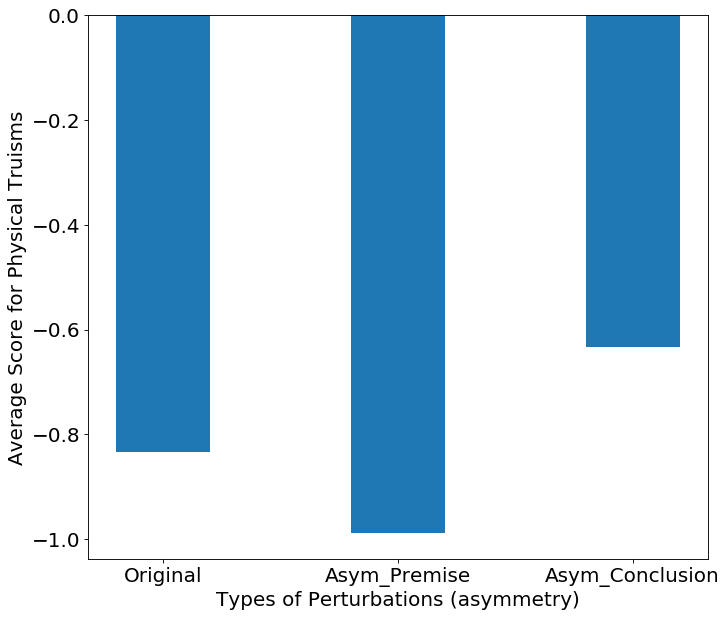

In [74]:
import matplotlib.pyplot as plt
import numpy as np
x = [0,2,4]
y = [-0.8343063132880992, -0.9881424535438258, -0.6328004476064919]

fig=plt.figure(figsize=(10, 9), dpi=80)
plt.bar(x,y)
plt.xlabel('Types of Perturbations (asymmetry)', fontsize=18)
plt.xticks([0,2,4], ('Original', 'Asym_Premise', 'Asym_Conclusion'))
plt.ylabel('Average Score for Physical Truisms', fontsize=18)
plt.tick_params(labelsize=18)
plt.show()
fig.savefig('./AvgScore_Physical_asym.pdf',bbox_inches='tight')

In [45]:
material_sub_type_results = {}
for result in material_results:
    score = float(result.split(':')[1])
    if score == 0:
        continue
    sub_type = result.split(',')[2].split(':')[0]
    if sub_type not in material_sub_type_results:
        material_sub_type_results[sub_type] = [score]
    else:
        material_sub_type_results[sub_type].append(score)
        
material_sub_type_results
    
    

{'asymmetric_conclusion': [-4.3835589510690784,
  0.9384413903043595,
  0.8142492709583095,
  -1.7879502164084045,
  0.8058154945657521,
  -15.244681368605013,
  -9.761845939625147,
  0.9404199540209732,
  0.4470266295200165,
  0.7863644422736862,
  0.701839978193653,
  -5.199629803494775,
  0.16228575687863883,
  0.8896773191815072,
  0.7731900023882625,
  0.9324261518800611,
  0.5669353453165689,
  -9.819886492006486,
  0.5669353453165689,
  0.9547778641463947,
  -9.213315546370895,
  0.8583893334061734,
  0.8248978646829533,
  -4.736082670242438,
  -4.993937688475545,
  0.861443700830753],
 'asymmetric_premise': [-3.8637882464767626,
  0.9368453555965236,
  0.7943989439251634,
  -2.698312222753352,
  0.738279187727262,
  -14.834148215787506,
  -9.315510862203718,
  0.9416200131510513,
  0.5915842789151695,
  0.7486826093943952,
  0.6543340814499382,
  -4.956988160588848,
  -0.052791342073224105,
  0.8905700907082554,
  0.7869577277397165,
  0.9311419899581707,
  0.49418644875925,
  

In [75]:
for sub_type, lst in material_sub_type_results.items():
    material_sub_type_results[sub_type] = sum(lst)/len(lst)
    
material_sub_type_results

{'asymmetric_conclusion': -2.0121451089397366,
 'asymmetric_premise': -1.738721898742205,
 'original': -5.003292002249865}

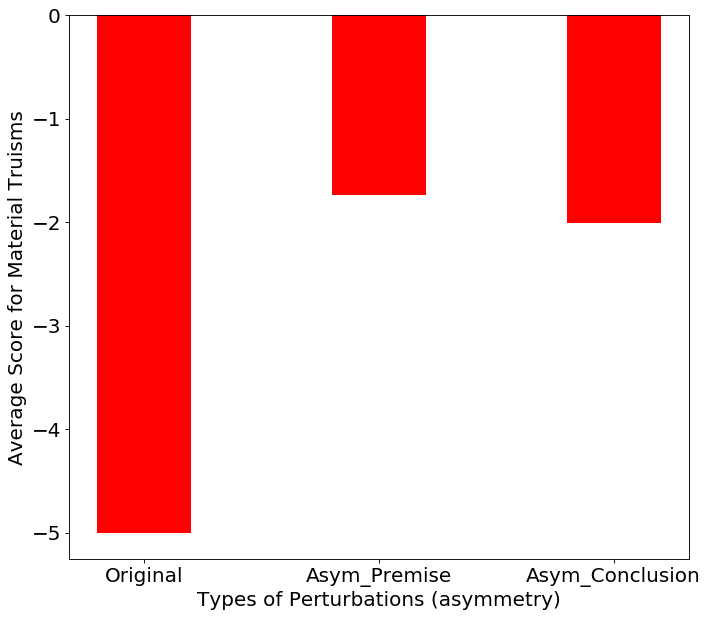

In [77]:
import matplotlib.pyplot as plt
import numpy as np
x = [0,2,4]
y = [-5.003292002249865, -1.738721898742205, -2.0121451089397366]

fig=plt.figure(figsize=(10, 9), dpi=80)
plt.bar(x,y,color='red')
plt.xlabel('Types of Perturbations (asymmetry)', fontsize=18)
plt.xticks([0,2,4], ('Original', 'Asym_Premise', 'Asym_Conclusion'))
plt.ylabel('Average Score for Material Truisms', fontsize=18)
plt.tick_params(labelsize=18)
plt.show()
fig.savefig('./AvgScore_Material_asym.pdf',bbox_inches='tight')

In [78]:
social_sub_type_results = {}
for result in social_results:
    score = float(result.split(':')[1])
    if score == 0:
        continue
    sub_type = result.split(',')[2].split(':')[0]
    if sub_type not in social_sub_type_results:
        social_sub_type_results[sub_type] = [score]
    else:
        social_sub_type_results[sub_type].append(score)
        
social_sub_type_results
    
    

{'asymmetric_conclusion': [-3.443183615277092,
  0.5291302733642638,
  0.7683651469024497,
  0.8174134427126846,
  -24.718031706623048,
  -9.041863298737336,
  -3.097720809110782,
  0.936046773125994,
  0.9020744109433716,
  -2.0804988716425012,
  0.7305022845647678,
  -9.535953382693902,
  -6.2263737958194385,
  0.9046670637998815,
  -2.4380132034323387,
  0.5253647825236084,
  0.5997922282015293,
  -34.02335082219839,
  -6.316969026945086,
  -16.659619384169382,
  -9.966320278727741,
  0.7173511100283453,
  -2.1841337068562834,
  -12.876218637564536,
  -0.5319775486038426,
  -79.65913781845559,
  -83.24419155760546,
  0.9999980992965077,
  -0.05809781925415723,
  0.8732506912804929,
  0.815642740060301,
  -0.6385013962229065,
  0.9285853168204763,
  -11.89135209891465,
  -6.131512314565287],
 'asymmetric_premise': [-2.298016404632419,
  0.4393845644158631,
  0.7695391497039217,
  0.824064938351083,
  -22.085879354239584,
  -12.030480275079437,
  -3.1016305691163293,
  0.9410853217320

In [79]:
for sub_type, lst in social_sub_type_results.items():
    social_sub_type_results[sub_type] = sum(lst)/len(lst)
    
social_sub_type_results

{'asymmetric_conclusion': -8.963281049422715,
 'asymmetric_premise': -8.688562417003379,
 'original': -4.84734621219697}

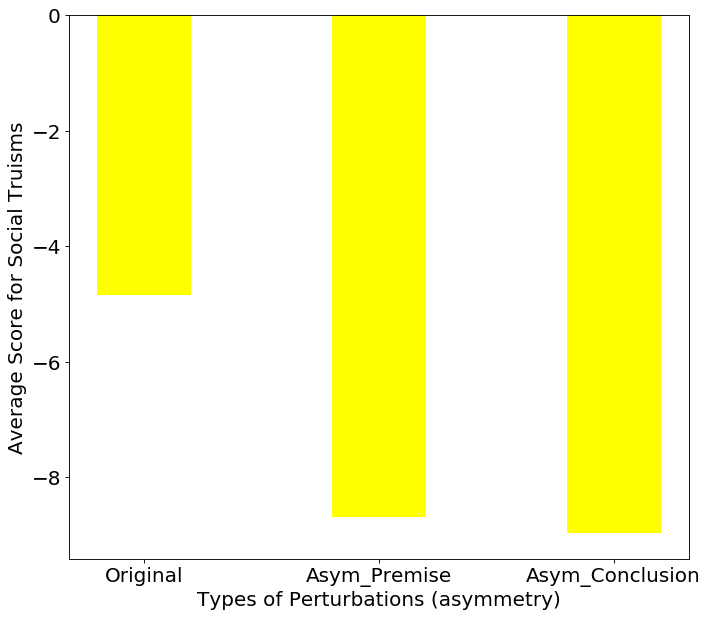

In [80]:
import matplotlib.pyplot as plt
import numpy as np
x = [0,2,4]
y = [-4.84734621219697, -8.688562417003379, -8.963281049422715]

fig=plt.figure(figsize=(10, 9), dpi=80)
plt.bar(x,y,color='yellow')
plt.xlabel('Types of Perturbations (asymmetry)', fontsize=18)
plt.xticks([0,2,4], ('Original', 'Asym_Premise', 'Asym_Conclusion'))
plt.ylabel('Average Score for Social Truisms', fontsize=18)
plt.tick_params(labelsize=18)
plt.show()
fig.savefig('./AvgScore_Social_asym.pdf',bbox_inches='tight')

In [62]:
for perturb_type, lst in material_perturb_type_results.items():
    material_perturb_type_results[perturb_type] = sum(lst)/len(lst)
    
material_perturb_type_results

{'antonym': -2.4678105568806004,
 'negation': -2.137875396193505,
 'negation_antonym': -3.7505430044527004,
 'negation_paraphrase': -6.052687328325622,
 'negation_paraphrase_inversion': -4.972321372014174,
 'original': -1.6358864566568165,
 'paraphrase': -2.143363803969787,
 'paraphrase_inversion': -1.3854883970797178}

In [67]:
for perturb_type, lst in social_perturb_type_results.items():
    social_perturb_type_results[perturb_type] = sum(lst)/len(lst)
    
social_perturb_type_results

{'antonym': -0.6549158823262313,
 'negation': -0.698340681549223,
 'negation_antonym': -16.911219912192276,
 'negation_paraphrase': -16.27021275068042,
 'negation_paraphrase_inversion': -3.4079761222349836,
 'original': -2.286271216977894,
 'paraphrase': -3.937239199644025,
 'paraphrase_inversion': -11.98689904287463}

In [123]:
for sub_type, lst in sub_type_results.items():
    sub_type_results[sub_type] = sum(lst)/len(lst)
    
sub_type_results

{'asymmetric_conclusion': -0.6328004476064919,
 'asymmetric_premise': -0.9881424535438258,
 'original': -0.8343063132880992}

In [ ]:
truism_results

In [105]:
import numpy as np
y_1 = np.array([1,2,3])
y = np.repeat(y_1,36)
len(y)

108

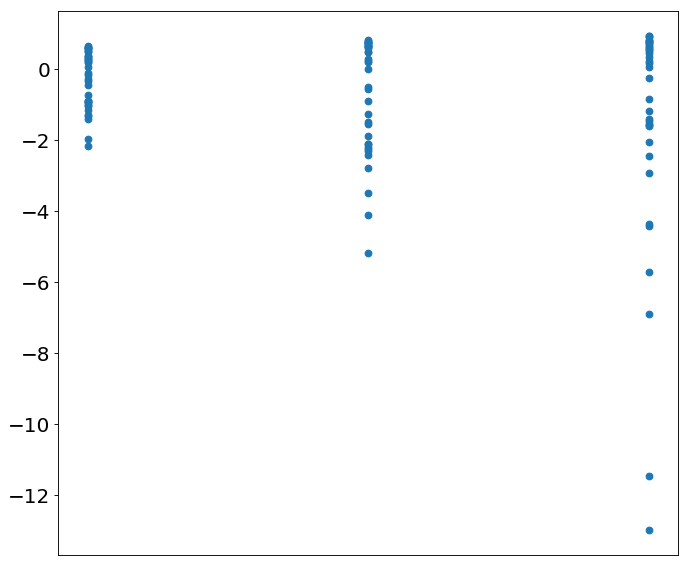

In [113]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(14)



x = truism_results
y_1 = np.array([1,2,3])
y = np.repeat(y_1,36)

#area = (30 * np.random.rand(N))**2  # 0 to 15 point radii
fig=plt.figure(figsize=(10, 9), dpi=80)
plt.tick_params(labelsize=18)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.yticks
plt.scatter(y, x)
plt.show()

In [81]:
roberta.fill_mask('A makes the varisty team while B does not, so A is <mask> than B.', topk=100)

[('A makes the varisty team while B does not, so A is better than B.',
  0.7882301211357117,
  ' better'),
 ('A makes the varisty team while B does not, so A is worse than B.',
  0.054775357246398926,
  ' worse'),
 ('A makes the varisty team while B does not, so A is stronger than B.',
  0.027967549860477448,
  ' stronger'),
 ('A makes the varisty team while B does not, so A is smarter than B.',
  0.015579295344650745,
  ' smarter'),
 ('A makes the varisty team while B does not, so A is cooler than B.',
  0.009619715623557568,
  ' cooler'),
 ('A makes the varisty team while B does not, so A is higher than B.',
  0.00953110121190548,
  ' higher'),
 ('A makes the varisty team while B does not, so A is faster than B.',
  0.007598595693707466,
  ' faster'),
 ('A makes the varisty team while B does not, so A is weaker than B.',
  0.00745492335408926,
  ' weaker'),
 ('A makes the varisty team while B does not, so A is more than B.',
  0.006382690742611885,
  ' more'),
 ('A makes the varisty 

In [64]:
physical_data['0']['antonym']['original'].split()

['A', 'is', 'larger', 'than', 'B,', 'so', 'A', 'cannot', 'fit', 'into', 'B']

In [56]:
for index, truism in physical_data.items():
    print(type(index))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [47]:
import csv
physical_templates = []
with open('./Physical Truism Templates') as tsvfile:
    reader = csv.reader(tsvfile, delimiter='\t')
    for row in reader:
        physical_templates.append(row)

In [85]:
material_templates = []
with open('./Material Truism Templates') as tsvfile:
    reader = csv.reader(tsvfile, delimiter='\t')
    for row in reader:
        material_templates.append(row)
        
social_templates = []
with open('./Social Truism Templates') as tsvfile:
    reader = csv.reader(tsvfile, delimiter='\t')
    for row in reader:
        social_templates.append(row)

In [64]:
physical_templates[24]

[]

## Pipeline to construct the truisms

In [38]:
# Get fictitious entities randomly generated
import random
from random import randint
import string

random.seed(1012)
def random_string_generator_variable_size(min_size, max_size, allowed_chars):
    return ''.join(random.choice(allowed_chars) for x in range(randint(min_size, max_size)))


chars = string.ascii_lowercase

fictitious_entities = []
for i in range(100):
    word_1 = random_string_generator_variable_size(3,12,chars)
    word_2 = random_string_generator_variable_size(3,12,chars)
    fictitious_entities.append((word_1, word_2))
    
fictitious_entities

[('femgtali', 'rsgueonam'),
 ('dpthmpxlfg', 'mrepurjhdxfa'),
 ('wcqbhzq', 'lyghy'),
 ('yfz', 'thqqrvkrqrm'),
 ('lzvt', 'elzbwfagwhe'),
 ('bwdybi', 'rqyktxy'),
 ('vqm', 'dsmu'),
 ('vkmkexj', 'fjgsfxqjwo'),
 ('umboff', 'lekeupfw'),
 ('swnwp', 'jklwvnsguk'),
 ('axf', 'dvrj'),
 ('yvczcwqx', 'siinp'),
 ('qrjlip', 'ubqia'),
 ('epbzbef', 'biocvr'),
 ('iaaayzpgnzv', 'fyamdsfa'),
 ('zlmslqgbjhx', 'srxptwhihnm'),
 ('ofy', 'yiruhuwhbom'),
 ('zws', 'hrjtf'),
 ('gxzytxjvbxr', 'fhnmoblw'),
 ('uxxdzijcf', 'yztkbblxgbe'),
 ('njbvmtjdqr', 'zwcxs'),
 ('ndvfw', 'wgfbahmo'),
 ('xtjxczop', 'gpjgcvi'),
 ('ezd', 'byr'),
 ('qvwi', 'gzgxbcffrlpi'),
 ('aklvkv', 'frrbsazfz'),
 ('jtmcg', 'mvdihyin'),
 ('ynoyodulpisk', 'nxuxdu'),
 ('eqtfuygsr', 'aquxecfgx'),
 ('mfk', 'ezyrgoibzs'),
 ('nbmdpna', 'cgoifrf'),
 ('muncodqs', 'vtvgcykw'),
 ('swt', 'tjjjrted'),
 ('eawjegvgvg', 'zzoicvrjigzq'),
 ('qioyzloy', 'wzvlqtg'),
 ('nczufgweurir', 'qsjrwcuoga'),
 ('oaphek', 'rcwt'),
 ('luf', 'jbpp'),
 ('zvyldya', 'dfrxelfoy'),
 ('v

In [38]:
physical_templates

[['A is larger than B, so A cannot fit into B.',
  'larger,smaller',
  'cannot,can'],
 ['B is larger than A, so B cannot fit into A.',
  'larger,smaller',
  'cannot,can'],
 ['A is larger than B, so B can fit into A.', 'larger,smaller', 'cannot,can'],
 ['B is larger than A, so A can fit into B.', 'larger,smaller', 'cannot,can'],
 ['A is smaller than B, so A can fit into B.', 'larger,smaller', 'cannot,can'],
 ['B is smaller than A, so B can fit into A.', 'larger,smaller', 'cannot,can'],
 ['A is smaller than B, so B cannot fit into A.',
  'larger,smaller',
  'cannot,can'],
 ['B is smaller than A, so A cannot fit into B.',
  'larger,smaller',
  'cannot,can'],
 ['A is larger than B, so A cannot be put into B.',
  'larger,smaller',
  'cannot,can'],
 ['B is larger than A, so B cannot be put into A.',
  'larger,smaller',
  'cannot,can'],
 ['A is larger than B, so B can be put into A.',
  'larger,smaller',
  'cannot,can'],
 ['B is larger than A, so A can be put into B.',
  'larger,smaller',
  '

In [89]:
# Construct masked templates
templates = social_templates
masked_templates = []
masked_template = []
for template in templates:
    if template == []:
        masked_templates.append(masked_template)
        masked_template = []
    else:
        statement = template[0]
        masks = template[1].split(',')
        right_answer = ''
        wrong_answer = ''
        masked_statement = statement
        for mask in masks:
            if mask in statement.split():
                masked_statement = str.replace(statement, mask, '<mask>')
                right_answer = mask
            else:
                wrong_answer = mask
        masked_template.append((masked_statement, right_answer, wrong_answer))

masked_templates

# masks = ['larger','smaller','cannot','can']

# masked_templates = []
# for template in size_contain_templates:
#     for i in range(len(masks)-2):
#         if masks[i] in template.split():
#             sent_1 = str.replace(template, masks[i], '<mask>')
#             answer_1 = masks[i]
#             masked_templates.append((sent_1,answer_1))
        
# masked_templates_put = []
# for template in size_put_on_templates:
#     for i in range(len(masks)-2):
#         if masks[i] in template.split():
#             sent_1 = str.replace(template, masks[i], '<mask>')
#             answer_1 = masks[i]
#             masked_templates_put.append((sent_1,answer_1))

[[('A is going to play the piano in front of B, so A is <mask> nervous than B.',
   'more',
   'less'),
  ('B is goint to play the piano in front of A, so B is <mask> nervous than A.',
   'more',
   'less'),
  ('A is goint to play the piano in front of B, so B is <mask> nervous than A.',
   'less',
   'more'),
  ('B is goint to play the piano in front of A, so A is <mask> nervous than B.',
   'less',
   'more'),
  ('A is going to play the guitar in front of B, so A is <mask> nervous than B.',
   'more',
   'less'),
  ('B is goint to play the guitar in front of A, so B is <mask> nervous than A.',
   'more',
   'less'),
  ('A is goint to play the guitar in front of B, so B is <mask> nervous than A.',
   'less',
   'more'),
  ('B is goint to play the guitar in front of A, so A is <mask> nervous than B.',
   'less',
   'more'),
  ('A is going to play the piano in front of B, so A is <mask> stressed than B.',
   'more',
   'less'),
  ('B is goint to play the piano in front of A, so B is <ma

In [55]:
masked_templates[0][0][1]

'larger'

In [90]:
# Fill in slots with fictitious entities TODO!!!

masked_truisms = []
for masked_template in masked_templates:
    template_truisms = []
    for i in range(len(masked_template)):
        template_truism = []
        for j in range(len(fictitious_entities)):
            fill_A = str.replace(masked_template[i][0], 'A', fictitious_entities[j][0])
            truism = str.replace(fill_A, 'B', fictitious_entities[j][1])
            template_truism.append(truism)
            if j == 5:
                break
        # (truism with entities, right answer, wrong answer) 
        template_truisms.append((template_truism, masked_template[i][1], masked_template[i][2])) 
    masked_truisms.append(template_truisms)
        
    
masked_truisms

[[(['femgtali is going to play the piano in front of rsgueonam, so femgtali is <mask> nervous than rsgueonam.',
    'dpthmpxlfg is going to play the piano in front of mrepurjhdxfa, so dpthmpxlfg is <mask> nervous than mrepurjhdxfa.',
    'wcqbhzq is going to play the piano in front of lyghy, so wcqbhzq is <mask> nervous than lyghy.',
    'yfz is going to play the piano in front of thqqrvkrqrm, so yfz is <mask> nervous than thqqrvkrqrm.',
    'lzvt is going to play the piano in front of elzbwfagwhe, so lzvt is <mask> nervous than elzbwfagwhe.',
    'bwdybi is going to play the piano in front of rqyktxy, so bwdybi is <mask> nervous than rqyktxy.'],
   'more',
   'less'),
  (['rsgueonam is goint to play the piano in front of femgtali, so rsgueonam is <mask> nervous than femgtali.',
    'mrepurjhdxfa is goint to play the piano in front of dpthmpxlfg, so mrepurjhdxfa is <mask> nervous than dpthmpxlfg.',
    'lyghy is goint to play the piano in front of wcqbhzq, so lyghy is <mask> nervous th

In [74]:
# Test Truisms on RoBERTa: binary evaluation: 1 means right answer > wrong answer, 0 othervise

results_physical = []
for type_truisms in masked_truisms:
    type_results = []
    for template_truisms in type_truisms:
        template_results = []
        right_answer = template_truisms[1]
        wrong_answer = template_truisms[2]
        for masked_truism in template_truisms[0]:
            answer_list = roberta.fill_mask(masked_truism, topk=10)
            right_pos = -1
            wrong_pos = -1
            for i in range(len(answer_list)):
                if answer_list[i][2][1:] == right_answer:
                    right_pos = i
                if answer_list[i][2][1:] == wrong_answer:
                    wrong_pos = i
                if right_pos != -1 and wrong_pos != -1:
                    break
            if right_pos == -1 or wrong_pos == -1:
                print('No right answer in top 10 for '+str(masked_truism))
            template_results.append(1 if right_pos < wrong_pos else 0)
        type_results.append(template_results)
    results_physical.append(type_results)
    
results_physical

No right answer in top 10 for wcqbhzq is <mask> than lyghy, so to put lyghy on wcqbhzq is easy.
No right answer in top 10 for lzvt is <mask> than elzbwfagwhe, so to put elzbwfagwhe on lzvt is easy.
No right answer in top 10 for bwdybi is <mask> than rqyktxy, so to put rqyktxy on bwdybi is easy.
No right answer in top 10 for lyghy is <mask> than wcqbhzq, so to put wcqbhzq on lyghy is easy.
No right answer in top 10 for rqyktxy is <mask> than bwdybi, so to put bwdybi on rqyktxy is easy.
No right answer in top 10 for wcqbhzq is <mask> than lyghy, so to put wcqbhzq on lyghy is easy.
No right answer in top 10 for lzvt is <mask> than elzbwfagwhe, so to put lzvt on elzbwfagwhe is easy.
No right answer in top 10 for femgtali is <mask> than rsgueonam, so femgtali should float more often than rsgueonam.
No right answer in top 10 for dpthmpxlfg is <mask> than mrepurjhdxfa, so dpthmpxlfg should float more often than mrepurjhdxfa.
No right answer in top 10 for wcqbhzq is <mask> than lyghy, so wcqbh

No right answer in top 10 for dpthmpxlfg is <mask> than mrepurjhdxfa, so dpthmpxlfg should be lighter than mrepurjhdxfa.
No right answer in top 10 for wcqbhzq is <mask> than lyghy, so wcqbhzq should be lighter than lyghy.
No right answer in top 10 for yfz is <mask> than thqqrvkrqrm, so yfz should be lighter than thqqrvkrqrm.
No right answer in top 10 for lzvt is <mask> than elzbwfagwhe, so lzvt should be lighter than elzbwfagwhe.
No right answer in top 10 for bwdybi is <mask> than rqyktxy, so bwdybi should be lighter than rqyktxy.
No right answer in top 10 for rsgueonam is <mask> than femgtali, so rsgueonam should be lighter than femgtali.
No right answer in top 10 for mrepurjhdxfa is <mask> than dpthmpxlfg, so mrepurjhdxfa should be lighter than dpthmpxlfg.
No right answer in top 10 for lyghy is <mask> than wcqbhzq, so lyghy should be lighter than wcqbhzq.
No right answer in top 10 for thqqrvkrqrm is <mask> than yfz, so thqqrvkrqrm should be lighter than yfz.
No right answer in top 10

[[[1, 1, 1, 1, 1, 1],
  [0, 1, 1, 1, 1, 1],
  [0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0],
  [1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1],
  [0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0],
  [0, 1, 1, 1, 1, 1],
  [0, 1, 1, 1, 1, 1],
  [0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0],
  [1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1],
  [1, 0, 1, 0, 0, 0],
  [0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0],
  [0, 0, 0, 1, 1, 0],
  [0, 0, 0, 1, 1, 0],
  [0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0],
  [1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1]],
 [[0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0],
  [1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1],
  [0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0],
  [0, 0, 1, 0, 1, 1],
  [0, 0, 1, 0, 0, 1],
  [1, 1, 0, 1, 0, 1],
  [1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1]],
 [[1, 0, 0, 0, 0, 0],
  [0, 1, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0],
  [0, 1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0, 0],
  [1, 0,

In [88]:
# Test Truisms on RoBERTa: binary evaluation: 1 means right answer > wrong answer, 0 othervise

results_material = []
for type_truisms in masked_truisms:
    type_results = []
    for template_truisms in type_truisms:
        template_results = []
        right_answer = template_truisms[1]
        wrong_answer = template_truisms[2]
        for masked_truism in template_truisms[0]:
            answer_list = roberta.fill_mask(masked_truism, topk=10)
            right_pos = -1
            wrong_pos = -1
            for i in range(len(answer_list)):
                if answer_list[i][2][1:] == right_answer:
                    right_pos = i
                if answer_list[i][2][1:] == wrong_answer:
                    wrong_pos = i
                if right_pos != -1 and wrong_pos != -1:
                    break
            if right_pos == -1 or wrong_pos == -1:
                print('No right answer in top 10 for '+str(masked_truism))
            template_results.append(1 if right_pos < wrong_pos else 0)
        type_results.append(template_results)
    results_material.append(type_results)
    
results_material

No right answer in top 10 for mrepurjhdxfa is made of wool and dpthmpxlfg is made of steel, so mrepurjhdxfa is <mask> than dpthmpxlfg.
No right answer in top 10 for wcqbhzq is made of wool and lyghy is made of steel, so lyghy is <mask> than wcqbhzq.
No right answer in top 10 for lzvt is made of wool and elzbwfagwhe is made of steel, so elzbwfagwhe is <mask> than lzvt.
No right answer in top 10 for bwdybi is made of wool and rqyktxy is made of steel, so rqyktxy is <mask> than bwdybi.
No right answer in top 10 for rsgueonam is made of wool and femgtali is made of steel, so femgtali is <mask> than rsgueonam.
No right answer in top 10 for mrepurjhdxfa is made of wool and dpthmpxlfg is made of steel, so dpthmpxlfg is <mask> than mrepurjhdxfa.
No right answer in top 10 for lyghy is made of wool and wcqbhzq is made of steel, so wcqbhzq is <mask> than lyghy.
No right answer in top 10 for thqqrvkrqrm is made of wool and yfz is made of steel, so yfz is <mask> than thqqrvkrqrm.
No right answer in

No right answer in top 10 for femgtali is made of metal and rsgueonam is made out of wool, so rsgueonam <mask> cut better than femgtali.
No right answer in top 10 for dpthmpxlfg is made of metal and mrepurjhdxfa is made out of wool, so mrepurjhdxfa <mask> cut better than dpthmpxlfg.
No right answer in top 10 for wcqbhzq is made of metal and lyghy is made out of wool, so lyghy <mask> cut better than wcqbhzq.
No right answer in top 10 for yfz is made of metal and thqqrvkrqrm is made out of wool, so thqqrvkrqrm <mask> cut better than yfz.
No right answer in top 10 for bwdybi is made of metal and rqyktxy is made out of wool, so rqyktxy <mask> cut better than bwdybi.
No right answer in top 10 for rsgueonam is made of metal and femgtali is made out of wool, so femgtali <mask> cut better than rsgueonam.
No right answer in top 10 for mrepurjhdxfa is made of metal and dpthmpxlfg is made out of wool, so dpthmpxlfg <mask> cut better than mrepurjhdxfa.
No right answer in top 10 for lyghy is made o

[[[1, 1, 1, 1, 1, 1],
  [1, 0, 1, 1, 1, 1],
  [1, 1, 0, 1, 0, 0],
  [0, 0, 0, 0, 0, 0],
  [0, 1, 1, 1, 0, 1],
  [0, 0, 1, 1, 0, 1],
  [0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0],
  [1, 0, 1, 1, 1, 1],
  [1, 1, 0, 0, 1, 1],
  [1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1],
  [1, 1, 0, 1, 1, 1],
  [1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1]],
 [[1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1],
  [0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0],
  [0, 1, 1, 1, 1, 1],
  [0, 1, 1, 1, 1, 1],
  [0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0],
  [1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1],
  [0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0],
  [1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1],
  [0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0]],
 [[0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0],
  [1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1],
  [0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0],
  [1, 1, 1, 1, 0, 1],
  [1, 1, 1, 1, 1, 1]],
 [[1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1],
  [1, 0, 1, 1, 1, 1],
  [1, 1, 1, 1, 0, 1],
  [1, 1, 1, 1, 1, 1],
  [1, 1

In [91]:
# Test Truisms on RoBERTa: binary evaluation: 1 means right answer > wrong answer, 0 othervise

results_social = []
for type_truisms in masked_truisms:
    type_results = []
    for template_truisms in type_truisms:
        template_results = []
        right_answer = template_truisms[1]
        wrong_answer = template_truisms[2]
        for masked_truism in template_truisms[0]:
            answer_list = roberta.fill_mask(masked_truism, topk=10)
            right_pos = -1
            wrong_pos = -1
            for i in range(len(answer_list)):
                if answer_list[i][2][1:] == right_answer:
                    right_pos = i
                if answer_list[i][2][1:] == wrong_answer:
                    wrong_pos = i
                if right_pos != -1 and wrong_pos != -1:
                    break
            if right_pos == -1 or wrong_pos == -1:
                print('No right answer in top 10 for '+str(masked_truism))
            template_results.append(1 if right_pos < wrong_pos else 0)
        type_results.append(template_results)
    results_social.append(type_results)
    
results_social

No right answer in top 10 for femgtali won the competition while rsgueonam lost, so femgtali is <mask> than rsgueonam.
No right answer in top 10 for dpthmpxlfg won the competition while mrepurjhdxfa lost, so dpthmpxlfg is <mask> than mrepurjhdxfa.
No right answer in top 10 for wcqbhzq won the competition while lyghy lost, so wcqbhzq is <mask> than lyghy.
No right answer in top 10 for yfz won the competition while thqqrvkrqrm lost, so yfz is <mask> than thqqrvkrqrm.
No right answer in top 10 for lzvt won the competition while elzbwfagwhe lost, so lzvt is <mask> than elzbwfagwhe.
No right answer in top 10 for bwdybi won the competition while rqyktxy lost, so bwdybi is <mask> than rqyktxy.
No right answer in top 10 for rsgueonam won the competition while femgtali lost, so rsgueonam is <mask> than femgtali.
No right answer in top 10 for mrepurjhdxfa won the competition while dpthmpxlfg lost, so mrepurjhdxfa is <mask> than dpthmpxlfg.
No right answer in top 10 for lyghy won the competition 

No right answer in top 10 for femgtali won the race while rsgueonam lost, so femgtali feels <mask> than rsgueonam.
No right answer in top 10 for dpthmpxlfg won the race while mrepurjhdxfa lost, so dpthmpxlfg feels <mask> than mrepurjhdxfa.
No right answer in top 10 for wcqbhzq won the race while lyghy lost, so wcqbhzq feels <mask> than lyghy.
No right answer in top 10 for yfz won the race while thqqrvkrqrm lost, so yfz feels <mask> than thqqrvkrqrm.
No right answer in top 10 for lzvt won the race while elzbwfagwhe lost, so lzvt feels <mask> than elzbwfagwhe.
No right answer in top 10 for bwdybi won the race while rqyktxy lost, so bwdybi feels <mask> than rqyktxy.
No right answer in top 10 for rsgueonam won the race while femgtali lost, so rsgueonam feels <mask> than femgtali.
No right answer in top 10 for mrepurjhdxfa won the race while dpthmpxlfg lost, so mrepurjhdxfa feels <mask> than dpthmpxlfg.
No right answer in top 10 for lyghy won the race while wcqbhzq lost, so lyghy feels <mas

[[[1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1],
  [0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0],
  [1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1],
  [0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0],
  [1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1],
  [0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0],
  [1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1],
  [0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0]],
 [[0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0],
  [1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1],
  [0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0],
  [1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1]],
 [[1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1],
  [0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0],
  [1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1],
  [0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0],
  [1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1],
  [0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0]],
 [[1, 1, 1, 1, 1, 1],
  [1, 1

In [76]:
avg_physical = []
for type_results in results_physical:
    avg = [sum(lst)/len(lst) for lst in type_results]
    avg_physical.append(avg)
avg_physical


[[1.0,
  0.8333333333333334,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.8333333333333334,
  0.8333333333333334,
  0.0,
  0.0,
  1.0,
  1.0,
  0.3333333333333333,
  0.0,
  0.0,
  0.0,
  0.3333333333333333,
  0.3333333333333333,
  0.0,
  0.0,
  1.0,
  1.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.5,
  0.3333333333333333,
  0.6666666666666666,
  1.0,
  1.0,
  1.0],
 [0.16666666666666666,
  0.16666666666666666,
  0.0,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0],
 [0.0,
  0.0,
  0.16666666666666666,
  0.16666666666666666,
  0.5,
  0.5,
  0.0,
  0.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0,
  1.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.5,
  0.3333333333333333,
  1.0,
  1.0,
  0.3333333333333333,
  0.5,
  0.0,
  0.16666666666666666,
  1.0,
  1.0,
  0.5,
  0.5,
  0.0,
  0.0]]

In [117]:
avg_material = []
for type_results in results_material:
    avg = [sum(lst)/len(lst) for lst in type_results]
    avg_material.append(avg)
    
avg_social = []
for type_results in results_social:
    avg = [sum(lst)/len(lst) for lst in type_results]
    avg_social.append(avg)
avg_social

[[1.0,
  1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  1.0,
  1.0],
 [1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0],
 [1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0],
 [1.0,
  1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  1.0,
  1.0],
 [1.0,
  1.0,
  0.5,
  0.5,
  0.16666666666666666,
  0.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.16666666666666666,
  0.0,
  0.3333333333333333,
  0.5,
  1.0,
  1.0]]

In [113]:
max(avg_physical[0]) - min(avg_physical[0])

1.0

In [114]:
import numpy as np
largest_differences = []
for lst in avg_physical:
    largest_differences.append(max(lst)-min(lst))
    
largest_differences

[1.0, 1.0, 1.0, 1.0, 0.0, 1.0]

In [118]:
import numpy as np
largest_differences_material = []
for lst in avg_material:
    largest_differences_material.append(max(lst)-min(lst))
    
sum(largest_differences_material)/len(largest_differences_material)

0.9444444444444445

In [119]:
import numpy as np
largest_differences_social = []
for lst in avg_social:
    largest_differences_social.append(max(lst)-min(lst))
    
sum(largest_differences_social)/len(largest_differences_social)

1.0

In [115]:
sum(largest_differences)/len(largest_differences)

0.8333333333333334

In [112]:
[0.8333333333333334, 0.9444444444444445, 1.0]

[0.20095486111111113,
 0.20562065972222221,
 0.12249228395061729,
 0.20999999999999996,
 0.0,
 0.18282214506172836]

In [78]:
len(avg_physical[0])

24

In [71]:
masked_truisms[0][0][0]

['femgtali is <mask> than rsgueonam, so femgtali cannot fit into rsgueonam.',
 'dpthmpxlfg is <mask> than mrepurjhdxfa, so dpthmpxlfg cannot fit into mrepurjhdxfa.',
 'wcqbhzq is <mask> than lyghy, so wcqbhzq cannot fit into lyghy.',
 'yfz is <mask> than thqqrvkrqrm, so yfz cannot fit into thqqrvkrqrm.',
 'lzvt is <mask> than elzbwfagwhe, so lzvt cannot fit into elzbwfagwhe.',
 'bwdybi is <mask> than rqyktxy, so bwdybi cannot fit into rqyktxy.',
 'vqm is <mask> than dsmu, so vqm cannot fit into dsmu.',
 'vkmkexj is <mask> than fjgsfxqjwo, so vkmkexj cannot fit into fjgsfxqjwo.',
 'umboff is <mask> than lekeupfw, so umboff cannot fit into lekeupfw.',
 'swnwp is <mask> than jklwvnsguk, so swnwp cannot fit into jklwvnsguk.',
 'axf is <mask> than dvrj, so axf cannot fit into dvrj.',
 'yvczcwqx is <mask> than siinp, so yvczcwqx cannot fit into siinp.',
 'qrjlip is <mask> than ubqia, so qrjlip cannot fit into ubqia.',
 'epbzbef is <mask> than biocvr, so epbzbef cannot fit into biocvr.',
 'ia

In [46]:
len(masked_templates[5])

24

In [6]:
size_contain_templates = ['ObjectA is larger than ObjectB, so ObjectA cannot fit into ObjectB.',
                          'ObjectB is larger than ObjectA, so ObjectB cannot fit into ObjectA.', 
                          'ObjectA is larger than ObjectB, so ObjectB can fit into ObjectA.', 
                          'ObjectB is larger than ObjectA, so ObjectA can fit into ObjectB.', 
                          'ObjectA is smaller than ObjectB, so ObjectA can fit into ObjectB.', 
                          'ObjectB is smaller than ObjectA, so ObjectB can fit into ObjectA.', 
                          'ObjectA is smaller than ObjectB, so ObjectB cannot fit into ObjectA.', 
                          'ObjectB is smaller than ObjectA, so ObjectA cannot fit into ObjectB.'
                         ]

size_put_on_templates = ['ObjectA is larger than ObjectB, so it\'s hard to put ObjectA on ObjectB.',
                         'ObjectB is larger than ObjectA, so it\'s hard to put ObjectB on ObjectA.',
                         'ObjectA is larger than ObjectB, so it\'s easy to put ObjectB on ObjectA.',
                         'ObjectB is larger than ObjectA, so it\'s easy to put ObjectA on ObjectB.',
                         'ObjectA is smaller than ObjectB, so it\'s hard to put ObjectA on ObjectB.',
                         'ObjectB is smaller than ObjectA, so it\'s hard to put ObjectB on ObjectA.',
                         'ObjectA is smaller than ObjectB, so it\'s easy to put ObjectB on ObjectA.'
                        ]



In [11]:
# Construct masked sentences -- mask 'larger/smaller'
masks = ['larger','smaller','cannot','can']

masked_templates = []
for template in size_contain_templates:
    for i in range(len(masks)-2):
        if masks[i] in template.split():
            sent_1 = str.replace(template, masks[i], '<mask>')
            answer_1 = masks[i]
            masked_templates.append((sent_1,answer_1))
        
masked_templates_put = []
for template in size_put_on_templates:
    for i in range(len(masks)-2):
        if masks[i] in template.split():
            sent_1 = str.replace(template, masks[i], '<mask>')
            answer_1 = masks[i]
            masked_templates_put.append((sent_1,answer_1))

In [12]:
masked_templates_put

[("ObjectA is <mask> than ObjectB, so it's hard to put ObjectA on ObjectB.",
  'larger'),
 ("ObjectB is <mask> than ObjectA, so it's hard to put ObjectB on ObjectA.",
  'larger'),
 ("ObjectA is <mask> than ObjectB, so it's easy to put ObjectB on ObjectA.",
  'larger'),
 ("ObjectB is <mask> than ObjectA, so it's easy to put ObjectA on ObjectB.",
  'larger'),
 ("ObjectA is <mask> than ObjectB, so it's hard to put ObjectA on ObjectB.",
  'smaller'),
 ("ObjectB is <mask> than ObjectA, so it's hard to put ObjectB on ObjectA.",
  'smaller'),
 ("ObjectA is <mask> than ObjectB, so it's easy to put ObjectB on ObjectA.",
  'smaller')]

In [6]:
# Construct masked sentences -- mask 'cannot/can'
masks_can = ['cannot','can']

masked_templates_can = []
for template in size_contain_templates:
    for i in range(len(masks_can)):
        if masks_can[i] in template.split():
            sent_1 = str.replace(template, masks_can[i], '<mask>')
            answer_1 = masks_can[i]
            masked_templates_can.append((sent_1,answer_1))
        

In [24]:
masked_templates_can

[('ObjectA is larger than ObjectB, so ObjectA <mask> fit into ObjectB.',
  'cannot'),
 ('ObjectB is larger than ObjectA, so ObjectB <mask> fit into ObjectA.',
  'cannot'),
 ('ObjectA is larger than ObjectB, so ObjectB <mask> fit into ObjectA.',
  'can'),
 ('ObjectB is larger than ObjectA, so ObjectA <mask> fit into ObjectB.',
  'can'),
 ('ObjectA is smaller than ObjectB, so ObjectA <mask> fit into ObjectB.',
  'can'),
 ('ObjectB is smaller than ObjectA, so ObjectB <mask> fit into ObjectA.',
  'can'),
 ('ObjectA is smaller than ObjectB, so ObjectB <mask> fit into ObjectA.',
  'cannot'),
 ('ObjectB is smaller than ObjectA, so ObjectA <mask> fit into ObjectB.',
  'cannot')]

In [14]:
# Fill in slots with fictitious entities -- mask "larger/smaller" and use "fit into"

masked_truisms = []
for i in range(len(masked_templates)):
    template_truisms = []
    for j in range(len(fictitious_entities)):
        fill_A = str.replace(masked_templates[i][0], 'ObjectA', fictitious_entities[j][0])
        truism = str.replace(fill_A, 'ObjectB', fictitious_entities[j][1])
        template_truisms.append(truism)
    masked_truisms.append((template_truisms, masked_templates[i][1]))
    
masked_truisms_put = []
for i in range(len(masked_templates_put)):
    template_truisms = []
    for j in range(len(fictitious_entities)):
        fill_A = str.replace(masked_templates_put[i][0], 'ObjectA', fictitious_entities[j][0])
        truism = str.replace(fill_A, 'ObjectB', fictitious_entities[j][1])
        template_truisms.append(truism)
    masked_truisms_put.append((template_truisms, masked_templates_put[i][1]))
    
masked_truisms_put
        
        



[(["femgtali is <mask> than rsgueonam, so it's hard to put femgtali on rsgueonam.",
   "dpthmpxlfg is <mask> than mrepurjhdxfa, so it's hard to put dpthmpxlfg on mrepurjhdxfa.",
   "wcqbhzq is <mask> than lyghy, so it's hard to put wcqbhzq on lyghy.",
   "yfz is <mask> than thqqrvkrqrm, so it's hard to put yfz on thqqrvkrqrm.",
   "lzvt is <mask> than elzbwfagwhe, so it's hard to put lzvt on elzbwfagwhe.",
   "bwdybi is <mask> than rqyktxy, so it's hard to put bwdybi on rqyktxy.",
   "vqm is <mask> than dsmu, so it's hard to put vqm on dsmu.",
   "vkmkexj is <mask> than fjgsfxqjwo, so it's hard to put vkmkexj on fjgsfxqjwo.",
   "umboff is <mask> than lekeupfw, so it's hard to put umboff on lekeupfw.",
   "swnwp is <mask> than jklwvnsguk, so it's hard to put swnwp on jklwvnsguk.",
   "axf is <mask> than dvrj, so it's hard to put axf on dvrj.",
   "yvczcwqx is <mask> than siinp, so it's hard to put yvczcwqx on siinp.",
   "qrjlip is <mask> than ubqia, so it's hard to put qrjlip on ubqia

In [8]:
# Fill in slots with fictitious entities -- mask "can/cannot" and use "fit into"

masked_truisms_can = []
for i in range(len(masked_templates_can)):
    template_truisms = []
    for j in range(len(fictitious_entities)):
        fill_A = str.replace(masked_templates_can[i][0], 'ObjectA', fictitious_entities[j][0])
        truism = str.replace(fill_A, 'ObjectB', fictitious_entities[j][1])
        template_truisms.append(truism)
    masked_truisms_can.append((template_truisms, masked_templates_can[i][1]))
    
masked_truisms_can
        



[(['femgtali is larger than rsgueonam, so femgtali <mask> fit into rsgueonam.',
   'dpthmpxlfg is larger than mrepurjhdxfa, so dpthmpxlfg <mask> fit into mrepurjhdxfa.',
   'wcqbhzq is larger than lyghy, so wcqbhzq <mask> fit into lyghy.',
   'yfz is larger than thqqrvkrqrm, so yfz <mask> fit into thqqrvkrqrm.',
   'lzvt is larger than elzbwfagwhe, so lzvt <mask> fit into elzbwfagwhe.',
   'bwdybi is larger than rqyktxy, so bwdybi <mask> fit into rqyktxy.',
   'vqm is larger than dsmu, so vqm <mask> fit into dsmu.',
   'vkmkexj is larger than fjgsfxqjwo, so vkmkexj <mask> fit into fjgsfxqjwo.',
   'umboff is larger than lekeupfw, so umboff <mask> fit into lekeupfw.',
   'swnwp is larger than jklwvnsguk, so swnwp <mask> fit into jklwvnsguk.',
   'axf is larger than dvrj, so axf <mask> fit into dvrj.',
   'yvczcwqx is larger than siinp, so yvczcwqx <mask> fit into siinp.',
   'qrjlip is larger than ubqia, so qrjlip <mask> fit into ubqia.',
   'epbzbef is larger than biocvr, so epbzbef <m

In [26]:
# Test Truisms on RoBERTa: binary evaluation: 1 means right answer > wrong answer, 0 othervise

results_can = []
for template_truisms in masked_truisms_can:
    template_results = []
    right_answer = template_truisms[1]
    wrong_answer = 'can' if right_answer=='cannot' else 'cannot'
    for masked_truism in template_truisms[0]:
        answer_list = roberta.fill_mask(masked_truism, topk=10)
        right_pos = -1
        wrong_pos = -1
        for i in range(len(answer_list)):
            if answer_list[i][2][1:] == right_answer:
                right_pos = i
            if answer_list[i][2][1:] == wrong_answer:
                wrong_pos = i
            if right_pos != -1 and wrong_pos != -1:
                break
        if right_pos == -1 or wrong_pos == -1:
            print('No right answer in top 10 for '+str(masked_truism))
        template_results.append(1 if right_pos < wrong_pos else 0)
    results_can.append(template_results)
    
results_can

[[1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0],
 [1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0]

In [15]:
# Test Truisms on RoBERTa: binary evaluation: 1 means right answer > wrong answer, 0 othervise

results_put_on = []
for template_truisms in masked_truisms_put:
    template_results = []
    right_answer = template_truisms[1]
    wrong_answer = 'larger' if right_answer=='smaller' else 'smaller'
    for masked_truism in template_truisms[0]:
        answer_list = roberta.fill_mask(masked_truism, topk=10)
        right_pos = -1
        wrong_pos = -1
        for i in range(len(answer_list)):
            if answer_list[i][2][1:] == right_answer:
                right_pos = i
            if answer_list[i][2][1:] == wrong_answer:
                wrong_pos = i
            if right_pos != -1 and wrong_pos != -1:
                break
        if right_pos == -1 or wrong_pos == -1:
            print('No right answer in top 10 for '+str(masked_truism))
        template_results.append(1 if right_pos < wrong_pos else 0)
    results_put_on.append(template_results)
    
results_put_on

No right answer in top 10 for axf is <mask> than dvrj, so it's hard to put axf on dvrj.
No right answer in top 10 for epbzbef is <mask> than biocvr, so it's hard to put epbzbef on biocvr.
No right answer in top 10 for qioyzloy is <mask> than wzvlqtg, so it's hard to put qioyzloy on wzvlqtg.
No right answer in top 10 for ukbwchgsj is <mask> than lzepaozne, so it's hard to put ukbwchgsj on lzepaozne.
No right answer in top 10 for ksvj is <mask> than cvp, so it's hard to put ksvj on cvp.
No right answer in top 10 for wzvlqtg is <mask> than qioyzloy, so it's hard to put wzvlqtg on qioyzloy.
No right answer in top 10 for jbpp is <mask> than luf, so it's hard to put jbpp on luf.
No right answer in top 10 for axuw is <mask> than qnufvnrnwas, so it's hard to put axuw on qnufvnrnwas.
No right answer in top 10 for bzerni is <mask> than igzdgzahza, so it's hard to put bzerni on igzdgzahza.
No right answer in top 10 for cvp is <mask> than ksvj, so it's hard to put cvp on ksvj.
No right answer in t

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0]

In [16]:
avg = [sum(lst)/len(lst) for lst in results_put_on]
avg

[0.08, 0.07, 0.04, 0.05, 0.91, 0.92, 0.95]

In [84]:
masked_truisms[0][0]

['femgtali is <mask> than rsgueonam, so femgtali cannot fit into rsgueonam.',
 'dpthmpxlfg is <mask> than mrepurjhdxfa, so dpthmpxlfg cannot fit into mrepurjhdxfa.',
 'wcqbhzq is <mask> than lyghy, so wcqbhzq cannot fit into lyghy.',
 'yfz is <mask> than thqqrvkrqrm, so yfz cannot fit into thqqrvkrqrm.',
 'lzvt is <mask> than elzbwfagwhe, so lzvt cannot fit into elzbwfagwhe.',
 'bwdybi is <mask> than rqyktxy, so bwdybi cannot fit into rqyktxy.',
 'vqm is <mask> than dsmu, so vqm cannot fit into dsmu.',
 'vkmkexj is <mask> than fjgsfxqjwo, so vkmkexj cannot fit into fjgsfxqjwo.',
 'umboff is <mask> than lekeupfw, so umboff cannot fit into lekeupfw.',
 'swnwp is <mask> than jklwvnsguk, so swnwp cannot fit into jklwvnsguk.',
 'axf is <mask> than dvrj, so axf cannot fit into dvrj.',
 'yvczcwqx is <mask> than siinp, so yvczcwqx cannot fit into siinp.',
 'qrjlip is <mask> than ubqia, so qrjlip cannot fit into ubqia.',
 'epbzbef is <mask> than biocvr, so epbzbef cannot fit into biocvr.',
 'ia

In [85]:
masked_truisms_put = []

for template_truisms in masked_truisms:
    new_template_truisms = template_truisms
    lst = new_template_truisms[0]
    counter = 0
    for sentence in lst:
        new_sent = str.replace(sentence, ' fit ', ' be put ')
        lst[counter] = new_sent
        counter += 1
    masked_truisms_put.append(new_template_truisms)
    
masked_truisms_put

[(['femgtali is <mask> than rsgueonam, so femgtali cannot be put into rsgueonam.',
   'dpthmpxlfg is <mask> than mrepurjhdxfa, so dpthmpxlfg cannot be put into mrepurjhdxfa.',
   'wcqbhzq is <mask> than lyghy, so wcqbhzq cannot be put into lyghy.',
   'yfz is <mask> than thqqrvkrqrm, so yfz cannot be put into thqqrvkrqrm.',
   'lzvt is <mask> than elzbwfagwhe, so lzvt cannot be put into elzbwfagwhe.',
   'bwdybi is <mask> than rqyktxy, so bwdybi cannot be put into rqyktxy.',
   'vqm is <mask> than dsmu, so vqm cannot be put into dsmu.',
   'vkmkexj is <mask> than fjgsfxqjwo, so vkmkexj cannot be put into fjgsfxqjwo.',
   'umboff is <mask> than lekeupfw, so umboff cannot be put into lekeupfw.',
   'swnwp is <mask> than jklwvnsguk, so swnwp cannot be put into jklwvnsguk.',
   'axf is <mask> than dvrj, so axf cannot be put into dvrj.',
   'yvczcwqx is <mask> than siinp, so yvczcwqx cannot be put into siinp.',
   'qrjlip is <mask> than ubqia, so qrjlip cannot be put into ubqia.',
   'epbzb

In [30]:
masked_truisms_put_can = []

for template_truisms in masked_truisms_can:
    new_template_truisms = template_truisms
    lst = new_template_truisms[0]
    counter = 0
    for sentence in lst:
        new_sent = str.replace(sentence, ' fit ', ' be put ')
        lst[counter] = new_sent
        counter += 1
    masked_truisms_put_can.append(new_template_truisms)
    
masked_truisms_put_can

[(['femgtali is larger than rsgueonam, so femgtali <mask> be put into rsgueonam.',
   'dpthmpxlfg is larger than mrepurjhdxfa, so dpthmpxlfg <mask> be put into mrepurjhdxfa.',
   'wcqbhzq is larger than lyghy, so wcqbhzq <mask> be put into lyghy.',
   'yfz is larger than thqqrvkrqrm, so yfz <mask> be put into thqqrvkrqrm.',
   'lzvt is larger than elzbwfagwhe, so lzvt <mask> be put into elzbwfagwhe.',
   'bwdybi is larger than rqyktxy, so bwdybi <mask> be put into rqyktxy.',
   'vqm is larger than dsmu, so vqm <mask> be put into dsmu.',
   'vkmkexj is larger than fjgsfxqjwo, so vkmkexj <mask> be put into fjgsfxqjwo.',
   'umboff is larger than lekeupfw, so umboff <mask> be put into lekeupfw.',
   'swnwp is larger than jklwvnsguk, so swnwp <mask> be put into jklwvnsguk.',
   'axf is larger than dvrj, so axf <mask> be put into dvrj.',
   'yvczcwqx is larger than siinp, so yvczcwqx <mask> be put into siinp.',
   'qrjlip is larger than ubqia, so qrjlip <mask> be put into ubqia.',
   'epbzb

In [31]:
# Test Truisms on RoBERTa: binary evaluation: 1 means right answer > wrong answer, 0 othervise

results_put_can = []
for template_truisms in masked_truisms_put_can:
    template_results = []
    right_answer = template_truisms[1]
    wrong_answer = 'can' if right_answer=='cannot' else 'cannot'
    for masked_truism in template_truisms[0]:
        answer_list = roberta.fill_mask(masked_truism, topk=10)
        right_pos = -1
        wrong_pos = -1
        for i in range(len(answer_list)):
            if answer_list[i][2][1:] == right_answer:
                right_pos = i
            if answer_list[i][2][1:] == wrong_answer:
                wrong_pos = i
            if right_pos != -1 and wrong_pos != -1:
                break
        if right_pos == -1 or wrong_pos == -1:
            print('No right answer in top 10 for '+str(masked_truism))
        template_results.append(1 if right_pos < wrong_pos else 0)
    results_put_can.append(template_results)
    
results_put_can

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0]

In [32]:
avg = [sum(lst)/len(lst) for lst in results_put_can]
avg

[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0]

In [9]:
masked_truisms_can

[(['femgtali is larger than rsgueonam, so femgtali <mask> fit into rsgueonam.',
   'dpthmpxlfg is larger than mrepurjhdxfa, so dpthmpxlfg <mask> fit into mrepurjhdxfa.',
   'wcqbhzq is larger than lyghy, so wcqbhzq <mask> fit into lyghy.',
   'yfz is larger than thqqrvkrqrm, so yfz <mask> fit into thqqrvkrqrm.',
   'lzvt is larger than elzbwfagwhe, so lzvt <mask> fit into elzbwfagwhe.',
   'bwdybi is larger than rqyktxy, so bwdybi <mask> fit into rqyktxy.',
   'vqm is larger than dsmu, so vqm <mask> fit into dsmu.',
   'vkmkexj is larger than fjgsfxqjwo, so vkmkexj <mask> fit into fjgsfxqjwo.',
   'umboff is larger than lekeupfw, so umboff <mask> fit into lekeupfw.',
   'swnwp is larger than jklwvnsguk, so swnwp <mask> fit into jklwvnsguk.',
   'axf is larger than dvrj, so axf <mask> fit into dvrj.',
   'yvczcwqx is larger than siinp, so yvczcwqx <mask> fit into siinp.',
   'qrjlip is larger than ubqia, so qrjlip <mask> fit into ubqia.',
   'epbzbef is larger than biocvr, so epbzbef <m

In [10]:
masked_truisms_contain = []

for template_truisms in masked_truisms:
    new_template_truisms = template_truisms
    lst = new_template_truisms[0]
    counter = 0
    for sentence in lst:
        new_sent = str.replace(sentence, ' fit into ', ' contain ')
        if ' can ' in new_sent:
            newer = str.replace(new_sent, ' can ', ' cannot ')
        elif ' cannot ' in new_sent:
            newer = str.replace(new_sent, ' cannot ', ' can ')
        lst[counter] = newer
        counter += 1
    masked_truisms_contain.append(new_template_truisms)
    
masked_truisms_contain


[(['femgtali is <mask> than rsgueonam, so femgtali can contain rsgueonam.',
   'dpthmpxlfg is <mask> than mrepurjhdxfa, so dpthmpxlfg can contain mrepurjhdxfa.',
   'wcqbhzq is <mask> than lyghy, so wcqbhzq can contain lyghy.',
   'yfz is <mask> than thqqrvkrqrm, so yfz can contain thqqrvkrqrm.',
   'lzvt is <mask> than elzbwfagwhe, so lzvt can contain elzbwfagwhe.',
   'bwdybi is <mask> than rqyktxy, so bwdybi can contain rqyktxy.',
   'vqm is <mask> than dsmu, so vqm can contain dsmu.',
   'vkmkexj is <mask> than fjgsfxqjwo, so vkmkexj can contain fjgsfxqjwo.',
   'umboff is <mask> than lekeupfw, so umboff can contain lekeupfw.',
   'swnwp is <mask> than jklwvnsguk, so swnwp can contain jklwvnsguk.',
   'axf is <mask> than dvrj, so axf can contain dvrj.',
   'yvczcwqx is <mask> than siinp, so yvczcwqx can contain siinp.',
   'qrjlip is <mask> than ubqia, so qrjlip can contain ubqia.',
   'epbzbef is <mask> than biocvr, so epbzbef can contain biocvr.',
   'iaaayzpgnzv is <mask> than f

In [17]:
masked_truisms_can[1]

(['rsgueonam is larger than femgtali, so rsgueonam <mask> fit into femgtali.',
  'mrepurjhdxfa is larger than dpthmpxlfg, so mrepurjhdxfa <mask> fit into dpthmpxlfg.',
  'lyghy is larger than wcqbhzq, so lyghy <mask> fit into wcqbhzq.',
  'thqqrvkrqrm is larger than yfz, so thqqrvkrqrm <mask> fit into yfz.',
  'elzbwfagwhe is larger than lzvt, so elzbwfagwhe <mask> fit into lzvt.',
  'rqyktxy is larger than bwdybi, so rqyktxy <mask> fit into bwdybi.',
  'dsmu is larger than vqm, so dsmu <mask> fit into vqm.',
  'fjgsfxqjwo is larger than vkmkexj, so fjgsfxqjwo <mask> fit into vkmkexj.',
  'lekeupfw is larger than umboff, so lekeupfw <mask> fit into umboff.',
  'jklwvnsguk is larger than swnwp, so jklwvnsguk <mask> fit into swnwp.',
  'dvrj is larger than axf, so dvrj <mask> fit into axf.',
  'siinp is larger than yvczcwqx, so siinp <mask> fit into yvczcwqx.',
  'ubqia is larger than qrjlip, so ubqia <mask> fit into qrjlip.',
  'biocvr is larger than epbzbef, so biocvr <mask> fit into e

In [18]:
masked_truisms_contain_can = []

for template_truisms in masked_truisms_can:
    lst = template_truisms[0]
    right_answer = 'cannot' if template_truisms[1] == 'can' else 'can'
    new_template_truisms = (lst, right_answer)
    counter = 0
    for sentence in new_template_truisms[0]:
        new_sent = str.replace(sentence, ' fit into ', ' contain ')
        new_template_truisms[0][counter] = new_sent
        counter += 1
    masked_truisms_contain_can.append(new_template_truisms)
    
masked_truisms_contain_can


[(['femgtali is larger than rsgueonam, so femgtali <mask> contain rsgueonam.',
   'dpthmpxlfg is larger than mrepurjhdxfa, so dpthmpxlfg <mask> contain mrepurjhdxfa.',
   'wcqbhzq is larger than lyghy, so wcqbhzq <mask> contain lyghy.',
   'yfz is larger than thqqrvkrqrm, so yfz <mask> contain thqqrvkrqrm.',
   'lzvt is larger than elzbwfagwhe, so lzvt <mask> contain elzbwfagwhe.',
   'bwdybi is larger than rqyktxy, so bwdybi <mask> contain rqyktxy.',
   'vqm is larger than dsmu, so vqm <mask> contain dsmu.',
   'vkmkexj is larger than fjgsfxqjwo, so vkmkexj <mask> contain fjgsfxqjwo.',
   'umboff is larger than lekeupfw, so umboff <mask> contain lekeupfw.',
   'swnwp is larger than jklwvnsguk, so swnwp <mask> contain jklwvnsguk.',
   'axf is larger than dvrj, so axf <mask> contain dvrj.',
   'yvczcwqx is larger than siinp, so yvczcwqx <mask> contain siinp.',
   'qrjlip is larger than ubqia, so qrjlip <mask> contain ubqia.',
   'epbzbef is larger than biocvr, so epbzbef <mask> contain 

In [19]:
# Test Truisms on RoBERTa: binary evaluation: 1 means right answer > wrong answer, 0 othervise

results_contain_can = []
for template_truisms in masked_truisms_contain_can:
    template_results = []
    right_answer = template_truisms[1]
    wrong_answer = 'can' if right_answer=='cannot' else 'cannot'
    for masked_truism in template_truisms[0]:
        answer_list = roberta.fill_mask(masked_truism, topk=10)
        right_pos = -1
        wrong_pos = -1
        for i in range(len(answer_list)):
            if answer_list[i][2][1:] == right_answer:
                right_pos = i
            if answer_list[i][2][1:] == wrong_answer:
                wrong_pos = i
            if right_pos != -1 and wrong_pos != -1:
                break
        if right_pos == -1 or wrong_pos == -1:
            print('No right answer in top 10 for '+str(masked_truism))
        template_results.append(1 if right_pos < wrong_pos else 0)
    results_contain_can.append(template_results)
    
results_contain_can

[[0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1],
 [0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1]

In [20]:
avg = [sum(lst)/len(lst) for lst in results_contain_can]
avg

[0.15, 0.15, 0.95, 0.97, 0.31, 0.31, 0.76, 0.77]

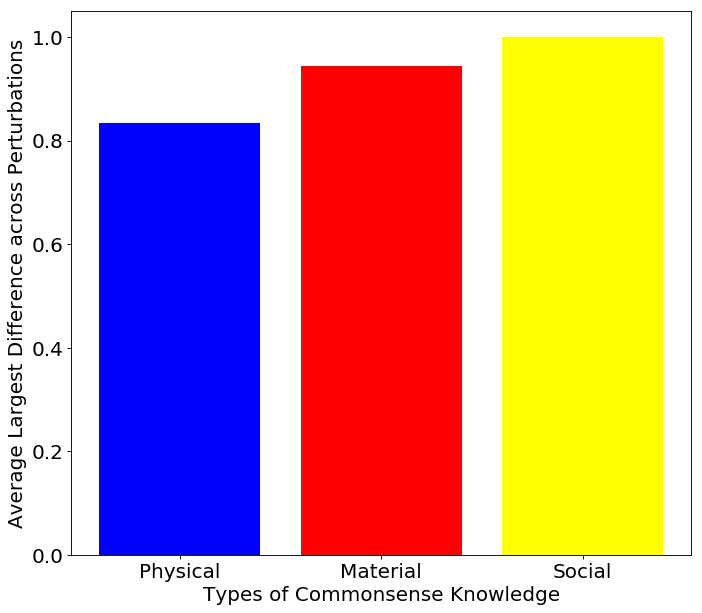

In [126]:
import matplotlib.pyplot as plt
import numpy as np

x = [0,1,2]
y = [0.8333333333333334, 0.9444444444444445, 1.0]
fig=plt.figure(figsize=(10, 9), dpi=80)
plt.bar(x,y,color=['blue', 'red', 'yellow'])
plt.xlabel('Types of Commonsense Knowledge', fontsize=18)
plt.xticks(np.arange(3), ('Physical', 'Material', 'Social'))
plt.ylabel('Average Largest Difference across Perturbations', fontsize=18)
plt.tick_params(labelsize=18)
plt.show()
fig.savefig('./Across_Knowledge.pdf',bbox_inches='tight')

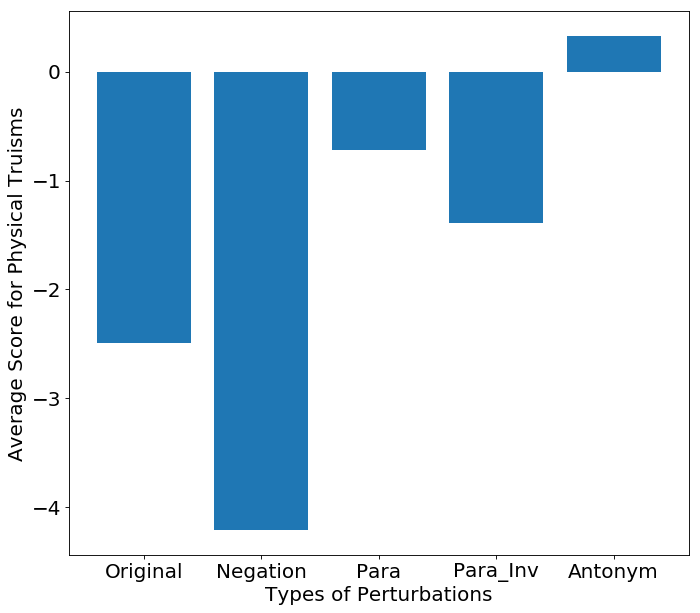

In [63]:
import matplotlib.pyplot as plt
import numpy as np
x = [0,1,2,3,4]
y = [-2.489, -4.210, -0.719, -1.390, 0.328]

fig=plt.figure(figsize=(10, 9), dpi=80)
plt.bar(x,y)
plt.xlabel('Types of Perturbations', fontsize=18)
plt.xticks(np.arange(5), ('Original', 'Negation', 'Para', 'Para_Inv', 'Antonym'))
plt.ylabel('Average Score for Physical Truisms', fontsize=18)
plt.tick_params(labelsize=18)
plt.show()
fig.savefig('./AvgScore_Physical.pdf',bbox_inches='tight')

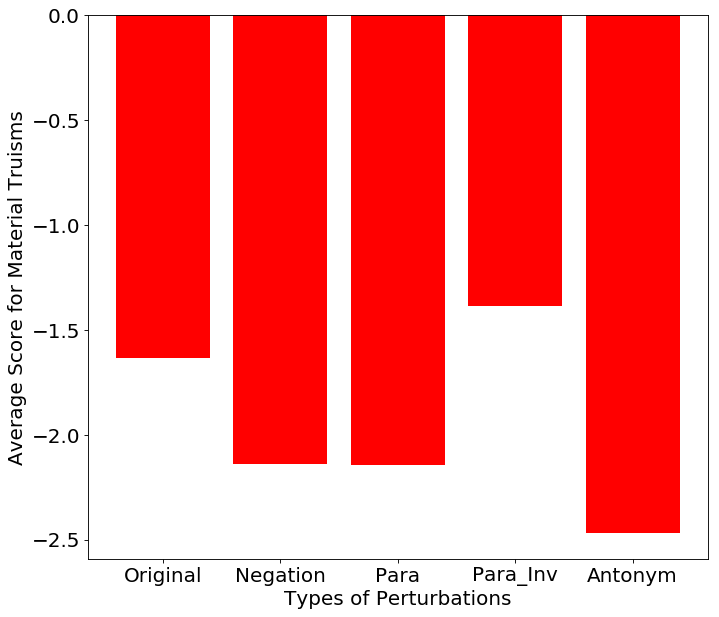

In [64]:
{'antonym': -2.4678105568806004,
 'negation': -2.137875396193505,
 'negation_antonym': -3.7505430044527004,
 'negation_paraphrase': -6.052687328325622,
 'negation_paraphrase_inversion': -4.972321372014174,
 'original': -1.6358864566568165,
 'paraphrase': -2.143363803969787,
 'paraphrase_inversion': -1.3854883970797178}

x = [0,1,2,3,4]
y = [-1.6358864566568165, -2.137875396193505, -2.143363803969787, -1.3854883970797178, -2.4678105568806004]

fig=plt.figure(figsize=(10, 9), dpi=80)
plt.bar(x,y,color='red')
plt.xlabel('Types of Perturbations', fontsize=18)
plt.xticks(np.arange(5), ('Original', 'Negation', 'Para', 'Para_Inv', 'Antonym'))
plt.ylabel('Average Score for Material Truisms', fontsize=18)
plt.tick_params(labelsize=18)
plt.show()
fig.savefig('./AvgScore_Material.pdf',bbox_inches='tight')

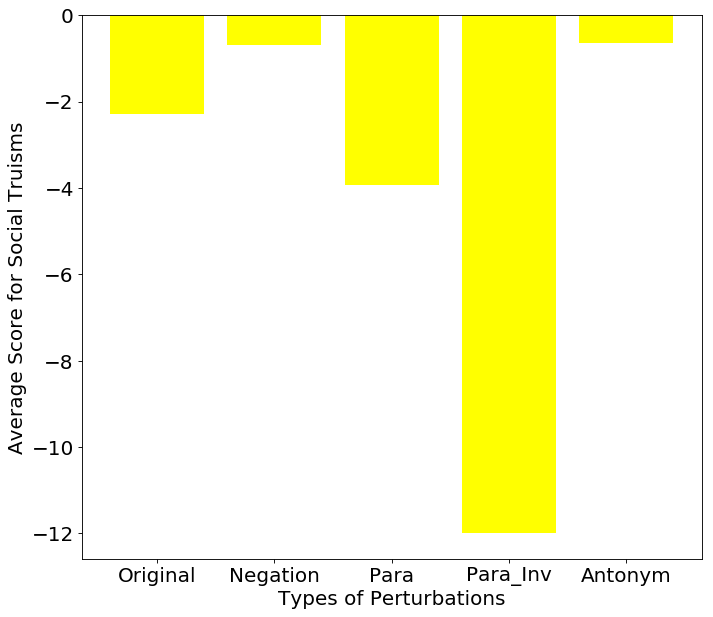

In [68]:
{'antonym': -0.6549158823262313,
 'negation': -0.698340681549223,
 'negation_antonym': -16.911219912192276,
 'negation_paraphrase': -16.27021275068042,
 'negation_paraphrase_inversion': -3.4079761222349836,
 'original': -2.286271216977894,
 'paraphrase': -3.937239199644025,
 'paraphrase_inversion': -11.98689904287463}

x = [0,1,2,3,4]
y = [-2.286271216977894, -0.698340681549223, -3.937239199644025, -11.98689904287463, -0.6549158823262313]

fig=plt.figure(figsize=(10, 9), dpi=80)
plt.bar(x,y,color='yellow')
plt.xlabel('Types of Perturbations', fontsize=18)
plt.xticks(np.arange(5), ('Original', 'Negation', 'Para', 'Para_Inv', 'Antonym'))
plt.ylabel('Average Score for Social Truisms', fontsize=18)
plt.tick_params(labelsize=18)
plt.show()
fig.savefig('./AvgScore_Social.pdf',bbox_inches='tight')

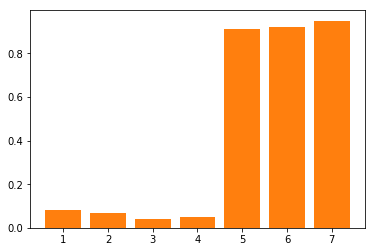

In [20]:
x = [1,2,3,4,5,6,7]
y = [0.08, 0.07, 0.04, 0.05, 0.91, 0.92, 0.95]
plt.bar(x,y)
plt.show()

In [70]:
roberta.fill_mask(masked_truisms[1][0][0],topk=10)[0][2][1:]

'smaller'

In [69]:
roberta.fill_mask(masked_templates[0][0], topk=10)[1][2]

' bigger'

In [ ]:
# roberta.fill_mask('A car is <mask> than a box, so a box can fit into a car', topk=10)

In [5]:
roberta.fill_mask('Barack Obama is married to <mask>.', topk=10)

[('Barack Obama is married to Michelle.', 0.9959065914154053, ' Michelle'),
 ('Barack Obama is married to Sasha.', 0.0009349026367999613, ' Sasha'),
 ('Barack Obama is married to Michele.', 0.0004565851704683155, ' Michele'),
 ('Barack Obama is married to Kenya.', 0.00026257213903591037, ' Kenya'),
 ('Barack Obama is married to Hillary.', 0.00014556144014932215, ' Hillary'),
 ('Barack Obama is married to Cindy.', 0.00013723195297643542, ' Cindy'),
 ('Barack Obama is married to Mary.', 0.00012838108523283154, ' Mary'),
 ('Barack Obama is married to Mrs.', 0.00012682296801358461, ' Mrs'),
 ('Barack Obama is married to Barbara.', 0.0001209668698720634, ' Barbara'),
 ('Barack Obama is married to Valerie.', 0.00010207008745055646, ' Valerie')]

In [25]:
roberta.fill_mask('If PersonX hits PersonY, then PersonX feels <mask>.', topk=10)

[('If PersonX hits PersonY, then PersonX feels better.',
  0.08663591742515564,
  ' better'),
 ('If PersonX hits PersonY, then PersonX feels bad.',
  0.07202097028493881,
  ' bad'),
 ('If PersonX hits PersonY, then PersonX feels good.',
  0.049450356513261795,
  ' good'),
 ('If PersonX hits PersonY, then PersonX feels pain.',
  0.0430028922855854,
  ' pain'),
 ('If PersonX hits PersonY, then PersonX feels hurt.',
  0.02905672788619995,
  ' hurt'),
 ('If PersonX hits PersonY, then PersonX feels guilty.',
  0.02267909236252308,
  ' guilty'),
 ('If PersonX hits PersonY, then PersonX feels sad.',
  0.022161509841680527,
  ' sad'),
 ('If PersonX hits PersonY, then PersonX feels betrayed.',
  0.018812963739037514,
  ' betrayed'),
 ('If PersonX hits PersonY, then PersonX feels happy.',
  0.01647092029452324,
  ' happy'),
 ('If PersonX hits PersonY, then PersonX feels it.',
  0.01597713865339756,
  ' it')]

In [9]:
roberta.fill_mask('Apple is a <mask>.', topk=10)

[('Apple is a company.', 0.20754487812519073, ' company'),
 ('Apple is a business.', 0.07637188583612442, ' business'),
 ('Apple is a competitor.', 0.03865204378962517, ' competitor'),
 ('Apple is a corporation.', 0.03247498720884323, ' corporation'),
 ('Apple is a monopoly.', 0.02787328138947487, ' monopoly'),
 ('Apple is a mess.', 0.02382655255496502, ' mess'),
 ('Apple is a problem.', 0.02296224795281887, ' problem'),
 ('Apple is a customer.', 0.018315274268388748, ' customer'),
 ('Apple is a brand.', 0.016319982707500458, ' brand'),
 ('Apple is a giant.', 0.011590670794248581, ' giant')]

In [130]:
roberta.fill_mask('To <mask> weight, an organism must consume fewer calories.', topk=10)

[('To lose weight, an organism must consume fewer calories.',
  0.7875971794128418,
  ' lose'),
 ('To gain weight, an organism must consume fewer calories.',
  0.11147218942642212,
  ' gain'),
 ('To maintain weight, an organism must consume fewer calories.',
  0.04603607580065727,
  ' maintain'),
 ('To reduce weight, an organism must consume fewer calories.',
  0.013824750669300556,
  ' reduce'),
 ('To shed weight, an organism must consume fewer calories.',
  0.009922103025019169,
  ' shed'),
 ('To regain weight, an organism must consume fewer calories.',
  0.004443994723260403,
  ' regain'),
 ('To drop weight, an organism must consume fewer calories.',
  0.003589519765228033,
  ' drop'),
 ('To achieve weight, an organism must consume fewer calories.',
  0.002234419109299779,
  ' achieve'),
 ('To control weight, an organism must consume fewer calories.',
  0.0019298817496746778,
  ' control'),
 ('To decrease weight, an organism must consume fewer calories.',
  0.0017233745893463492,
  

In [45]:
roberta.fill_mask('To lose weight, an organism must consume <mask> calories.', topk=10)

[('To lose weight, an organism must consume fewer calories.',
  0.737299919128418,
  ' fewer'),
 ('To lose weight, an organism must consume less calories.',
  0.14080582559108734,
  ' less'),
 ('To lose weight, an organism must consume more calories.',
  0.07923448085784912,
  ' more'),
 ('To lose weight, an organism must consume enough calories.',
  0.004827161785215139,
  ' enough'),
 ('To lose weight, an organism must consume lower calories.',
  0.003458078019320965,
  ' lower'),
 ('To lose weight, an organism must consume extra calories.',
  0.0031146532855927944,
  ' extra'),
 ('To lose weight, an organism must consume additional calories.',
  0.0029596907552331686,
  ' additional'),
 ('To lose weight, an organism must consume excess calories.',
  0.002342013642191887,
  ' excess'),
 ('To lose weight, an organism must consume sufficient calories.',
  0.0018535052658990026,
  ' sufficient'),
 ('To lose weight, an organism must consume few calories.',
  0.0013952830340713263,
  ' fe

In [9]:
roberta.fill_mask('Only <mask> are biologically able to give birth.', topk=100)

[('Only women are biologically able to give birth.',
  0.26708585023880005,
  ' women'),
 ('Only humans are biologically able to give birth.',
  0.17849332094192505,
  ' humans'),
 ('Only females are biologically able to give birth.',
  0.1598704308271408,
  ' females'),
 ('Only males are biologically able to give birth.',
  0.047622986137866974,
  ' males'),
 ('Only animals are biologically able to give birth.',
  0.03869757428765297,
  ' animals'),
 ('Only men are biologically able to give birth.',
  0.023081740364432335,
  ' men'),
 ('Only mammals are biologically able to give birth.',
  0.018191998824477196,
  ' mammals'),
 ('Only dogs are biologically able to give birth.',
  0.01588539034128189,
  ' dogs'),
 ('Only cows are biologically able to give birth.',
  0.0137763237580657,
  ' cows'),
 ('Only adults are biologically able to give birth.',
  0.01330635230988264,
  ' adults'),
 ('Only chimpanzees are biologically able to give birth.',
  0.012879554182291031,
  ' chimpanzees'),

In [4]:
roberta.fill_mask('He kills a bug and he feels <mask>.', topk=100)

NameError: name 'roberta' is not defined

In [15]:
roberta.fill_mask('He kills a dog and he feels <mask>.', topk=100)

[('He kills a dog and he feels guilty.', 0.14717742800712585, ' guilty'),
 ('He kills a dog and he feels good.', 0.13399174809455872, ' good'),
 ('He kills a dog and he feels bad.', 0.12899532914161682, ' bad'),
 ('He kills a dog and he feels better.', 0.12844440340995789, ' better'),
 ('He kills a dog and he feels remorse.', 0.03669046238064766, ' remorse'),
 ('He kills a dog and he feels justified.', 0.03555062785744667, ' justified'),
 ('He kills a dog and he feels terrible.', 0.020632660016417503, ' terrible'),
 ('He kills a dog and he feels happy.', 0.013968906365334988, ' happy'),
 ('He kills a dog and he feels relieved.', 0.01337751466780901, ' relieved'),
 ('He kills a dog and he feels ashamed.', 0.01335838995873928, ' ashamed'),
 ('He kills a dog and he feels great.', 0.012891557067632675, ' great'),
 ('He kills a dog and he feels sad.', 0.012459847144782543, ' sad'),
 ('He kills a dog and he feels satisfied.',
  0.010714499279856682,
  ' satisfied'),
 ('He kills a dog and he 

In [23]:
roberta.fill_mask('He kills a process and he feels <mask>.', topk=100)

[('He kills a process and he feels good.', 0.16265910863876343, ' good'),
 ('He kills a process and he feels better.', 0.10204996913671494, ' better'),
 ('He kills a process and he feels free.', 0.0529557503759861, ' free'),
 ('He kills a process and he feels satisfaction.',
  0.038128919899463654,
  ' satisfaction'),
 ('He kills a process and he feels satisfied.',
  0.037115179002285004,
  ' satisfied'),
 ('He kills a process and he feels relief.', 0.02903629094362259, ' relief'),
 ('He kills a process and he feels it.', 0.027846699580550194, ' it'),
 ('He kills a process and he feels liberated.',
  0.02558429352939129,
  ' liberated'),
 ('He kills a process and he feels relieved.',
  0.02398156002163887,
  ' relieved'),
 ('He kills a process and he feels bad.', 0.01822793111205101, ' bad'),
 ('He kills a process and he feels alive.', 0.017554588615894318, ' alive'),
 ('He kills a process and he feels guilty.', 0.01682518608868122, ' guilty'),
 ('He kills a process and he feels empowe

In [31]:
roberta.fill_mask('He accidentally kills a bug and he feels <mask>.', topk=100)

[('He accidentally kills a bug and he feels bad.',
  0.33823201060295105,
  ' bad'),
 ('He accidentally kills a bug and he feels guilty.',
  0.17167790234088898,
  ' guilty'),
 ('He accidentally kills a bug and he feels sad.',
  0.05540178716182709,
  ' sad'),
 ('He accidentally kills a bug and he feels terrible.',
  0.05450937896966934,
  ' terrible'),
 ('He accidentally kills a bug and he feels sick.',
  0.04720093309879303,
  ' sick'),
 ('He accidentally kills a bug and he feels remorse.',
  0.03028249554336071,
  ' remorse'),
 ('He accidentally kills a bug and he feels horrible.',
  0.026261355727910995,
  ' horrible'),
 ('He accidentally kills a bug and he feels awful.',
  0.017886772751808167,
  ' awful'),
 ('He accidentally kills a bug and he feels violated.',
  0.017348429188132286,
  ' violated'),
 ('He accidentally kills a bug and he feels angry.',
  0.01139844674617052,
  ' angry'),
 ('He accidentally kills a bug and he feels disgusted.',
  0.011296850629150867,
  ' disguste

In [32]:
roberta.fill_mask('He accidentally kills a dog and he feels <mask>.', topk=100)

[('He accidentally kills a dog and he feels guilty.',
  0.2830908000469208,
  ' guilty'),
 ('He accidentally kills a dog and he feels bad.',
  0.25662100315093994,
  ' bad'),
 ('He accidentally kills a dog and he feels terrible.',
  0.12794166803359985,
  ' terrible'),
 ('He accidentally kills a dog and he feels horrible.',
  0.06026224419474602,
  ' horrible'),
 ('He accidentally kills a dog and he feels remorse.',
  0.04417078569531441,
  ' remorse'),
 ('He accidentally kills a dog and he feels awful.',
  0.03505624830722809,
  ' awful'),
 ('He accidentally kills a dog and he feels sick.',
  0.02418706938624382,
  ' sick'),
 ('He accidentally kills a dog and he feels sad.',
  0.020214835181832314,
  ' sad'),
 ('He accidentally kills a dog and he feels guilt.',
  0.015357530675828457,
  ' guilt'),
 ('He accidentally kills a dog and he feels ashamed.',
  0.009990401566028595,
  ' ashamed'),
 ('He accidentally kills a dog and he feels responsible.',
  0.007265517488121986,
  ' responsib

In [19]:
roberta.fill_mask('He accidentally kills his mom and he feels <mask>.', topk=100)

[('He accidentally kills his mom and he feels guilty.',
  0.34311485290527344,
  ' guilty'),
 ('He accidentally kills his mom and he feels terrible.',
  0.11746664345264435,
  ' terrible'),
 ('He accidentally kills his mom and he feels bad.',
  0.09015451371669769,
  ' bad'),
 ('He accidentally kills his mom and he feels horrible.',
  0.08648768812417984,
  ' horrible'),
 ('He accidentally kills his mom and he feels sick.',
  0.06290223449468613,
  ' sick'),
 ('He accidentally kills his mom and he feels remorse.',
  0.0470254085958004,
  ' remorse'),
 ('He accidentally kills his mom and he feels guilt.',
  0.03468878194689751,
  ' guilt'),
 ('He accidentally kills his mom and he feels awful.',
  0.034640517085790634,
  ' awful'),
 ('He accidentally kills his mom and he feels ashamed.',
  0.015855833888053894,
  ' ashamed'),
 ('He accidentally kills his mom and he feels sad.',
  0.010176632553339005,
  ' sad'),
 ('He accidentally kills his mom and he feels betrayed.',
  0.01008108071982

In [20]:
roberta.fill_mask('He accidentally kills a process and he feels <mask>.', topk=100)

[('He accidentally kills a process and he feels guilty.',
  0.15928219258785248,
  ' guilty'),
 ('He accidentally kills a process and he feels bad.',
  0.12465248256921768,
  ' bad'),
 ('He accidentally kills a process and he feels remorse.',
  0.05448530986905098,
  ' remorse'),
 ('He accidentally kills a process and he feels terrible.',
  0.04873460531234741,
  ' terrible'),
 ('He accidentally kills a process and he feels sick.',
  0.04063580557703972,
  ' sick'),
 ('He accidentally kills a process and he feels sad.',
  0.030506063252687454,
  ' sad'),
 ('He accidentally kills a process and he feels guilt.',
  0.028688639402389526,
  ' guilt'),
 ('He accidentally kills a process and he feels helpless.',
  0.025461753830313683,
  ' helpless'),
 ('He accidentally kills a process and he feels horrible.',
  0.021206920966506004,
  ' horrible'),
 ('He accidentally kills a process and he feels violated.',
  0.020651517435908318,
  ' violated'),
 ('He accidentally kills a process and he fee